# Churn Rate.
**Autor: Carlos Espadin Medina**

**Versión 3.0**

**Caso de estudio:** Syngenta México CP desea estimar el "Churn", cuyo significado es un término común en marketing que se refiere a la tasa de abandono o cancelación de clientes en un negocio o servicio en un período determinado.

## Librerias Necesarias:

In [54]:
import pandas as pd
import numpy as np
import missingno as msno
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from datetime import datetime
from qvd import qvd_reader

## Carga de Datos.

In [55]:
df_clientes = qvd_reader.read(r"C:\Users\carlo\Syngenta\Projects for Analysis - General\Data\CustomerSales.qvd")
df_clientes

bp_id Fecha de Facturacion Material.Number    SoldTo   Ship_to  \
0      21107279           09/01/2020           65753    500060    500060   
1      21107733           09/01/2020           62285    500258    500258   
2      21278743           09/01/2020           58075  10303065  10303065   
3      21107733           09/01/2020           20151    500258  10280614   
4      21107420           09/01/2020           26868  10147528  10254519   
...         ...                  ...             ...       ...       ...   
65805  21374114           09/01/2024           40749  10331375  10332120   
65806  21374114           09/01/2024           39964  10331375  10332120   
65807  21335589           07/02/2024           19544  10317368  10318179   
65808  21109322           07/02/2024           26867  10163622  10163622   
65809  21330867           07/02/2024           64791  10315656  10315656   

                             Clientes NegocioAbrv Fecha de Registro  \
0      PROVEEDORA AGRICOLA DE TECOMAN          FG        17/11/2017   
1              AGROINSUMOS DEL CENTRO          FG        17/11/2017   
2            MARIA TERESA SOLIS RAMOS          IN        20/05/2019   
3              AGROINSUMOS DEL CENTRO          HS        17/11/2017   
4                           AFM AGROS          IN        17/11/2017   
...                               ...         ...               ...   
65805             ZITA ROSAS MARTINEZ          FG        18/11/2020   
65806             ZITA ROSAS MARTINEZ          FG        18/11/2020   
65807           FERTILIZANTES TEPEYAC          OT        01/04/2020   
65808        AGROQUIMICOS DE SAN LUIS          HS        17/11/2017   
65809             JOEL GARCIA SERAFIN          IN        06/03/2020   

      Devoluciones Estado TERRITORY_NUM   SO LineaNegocioAbrv Volumen  \
0                0    COL        A9442C  3CR               FG     180   
1                0    QUE        A9522D  3CR               FG      60   
2                0    JAL        A5342F  3CR               IN       4   
3                0    QUE        A9522D  3CR               HS     240   
4                0    MIC        A9472K  3CR               IN    16.2   
...            ...    ...           ...  ...              ...     ...   
65805            1    VER        A5542F  3CR               FG     -10   
65806            1    VER        A5542F  3CR               FG     -12   
65807            1    SON        A9602H  3CR               OT     -72   
65808            1    SON        A9572D  3CR               HS  -21.12   
65809            1    NAY        A9602I  3CR               IN    -3.6   

          Consumo  
0       185433.21  
1        90094.28  
2         5720.36  
3        49012.41  
4        43702.67  
...           ...  
65805    -4869.14  
65806     -6142.8  
65807           0  
65808  -186689.17  
65809      -19546  

[65810 rows x 15 columns]

## Preprocesamiento de los datos.

In [56]:
#### Tratamiento de datos null y cambio de nombre a ciertas columnas.
df_clientes['Devolucion']=df_clientes['Devoluciones']
df_clientes['Devolucion']=  pd.to_numeric(df_clientes['Devolucion'], errors='coerce')
df_clientes['bp_id'] = df_clientes['bp_id'].replace(['-', ' '], np.nan)
df_clientes['LineaNegocioAbrv'] = df_clientes['LineaNegocioAbrv'].replace(['-', ' '], np.nan)
df_clientes['Fecha_Registro'] = df_clientes['Fecha de Registro'].replace(['-', ' '], np.nan)
df_clientes['Estado'] = df_clientes['Estado'].replace(['-', ' '], np.nan)
df_clientes['Fecha de Facturacion'] = df_clientes['Fecha de Facturacion'].replace(['-', ' '], None)
df_clientes['Material.Number'] = df_clientes['Material.Number'].replace([np.nan], 'Sin producto')
df_clientes

bp_id Fecha de Facturacion Material.Number    SoldTo   Ship_to  \
0      21107279           09/01/2020           65753    500060    500060   
1      21107733           09/01/2020           62285    500258    500258   
2      21278743           09/01/2020           58075  10303065  10303065   
3      21107733           09/01/2020           20151    500258  10280614   
4      21107420           09/01/2020           26868  10147528  10254519   
...         ...                  ...             ...       ...       ...   
65805  21374114           09/01/2024           40749  10331375  10332120   
65806  21374114           09/01/2024           39964  10331375  10332120   
65807  21335589           07/02/2024           19544  10317368  10318179   
65808  21109322           07/02/2024           26867  10163622  10163622   
65809  21330867           07/02/2024           64791  10315656  10315656   

                             Clientes NegocioAbrv Fecha de Registro  \
0      PROVEEDORA AGRICOLA DE TECOMAN          FG        17/11/2017   
1              AGROINSUMOS DEL CENTRO          FG        17/11/2017   
2            MARIA TERESA SOLIS RAMOS          IN        20/05/2019   
3              AGROINSUMOS DEL CENTRO          HS        17/11/2017   
4                           AFM AGROS          IN        17/11/2017   
...                               ...         ...               ...   
65805             ZITA ROSAS MARTINEZ          FG        18/11/2020   
65806             ZITA ROSAS MARTINEZ          FG        18/11/2020   
65807           FERTILIZANTES TEPEYAC          OT        01/04/2020   
65808        AGROQUIMICOS DE SAN LUIS          HS        17/11/2017   
65809             JOEL GARCIA SERAFIN          IN        06/03/2020   

      Devoluciones Estado TERRITORY_NUM   SO LineaNegocioAbrv Volumen  \
0                0    COL        A9442C  3CR               FG     180   
1                0    QUE        A9522D  3CR               FG      60   
2                0    JAL        A5342F  3CR               IN       4   
3                0    QUE        A9522D  3CR               HS     240   
4                0    MIC        A9472K  3CR               IN    16.2   
...            ...    ...           ...  ...              ...     ...   
65805            1    VER        A5542F  3CR               FG     -10   
65806            1    VER        A5542F  3CR               FG     -12   
65807            1    SON        A9602H  3CR               OT     -72   
65808            1    SON        A9572D  3CR               HS  -21.12   
65809            1    NAY        A9602I  3CR               IN    -3.6   

          Consumo  Devolucion Fecha_Registro  
0       185433.21           0     17/11/2017  
1        90094.28           0     17/11/2017  
2         5720.36           0     20/05/2019  
3        49012.41           0     17/11/2017  
4        43702.67           0     17/11/2017  
...           ...         ...            ...  
65805    -4869.14           1     18/11/2020  
65806     -6142.8           1     18/11/2020  
65807           0           1     01/04/2020  
65808  -186689.17           1     17/11/2017  
65809      -19546           1     06/03/2020  

[65810 rows x 17 columns]

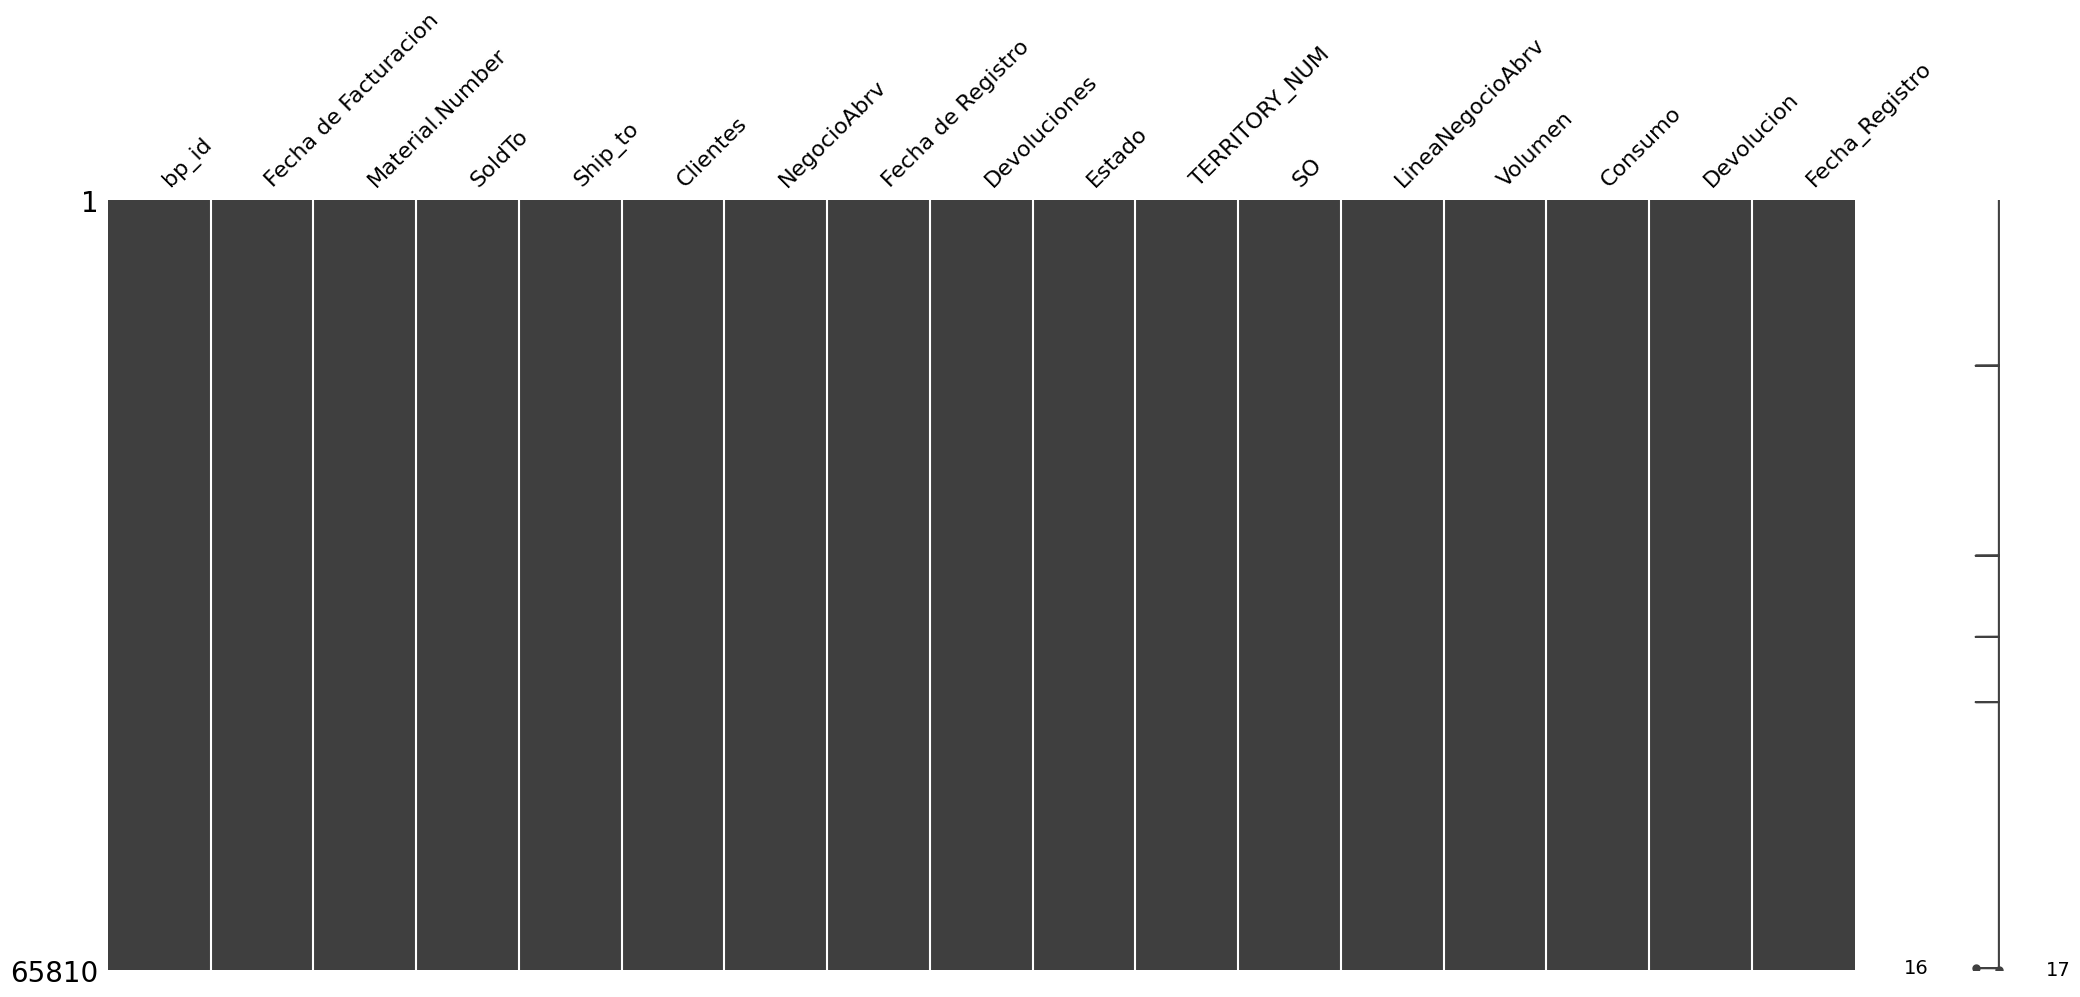

In [57]:
msno.matrix(df_clientes);

<Axes: >

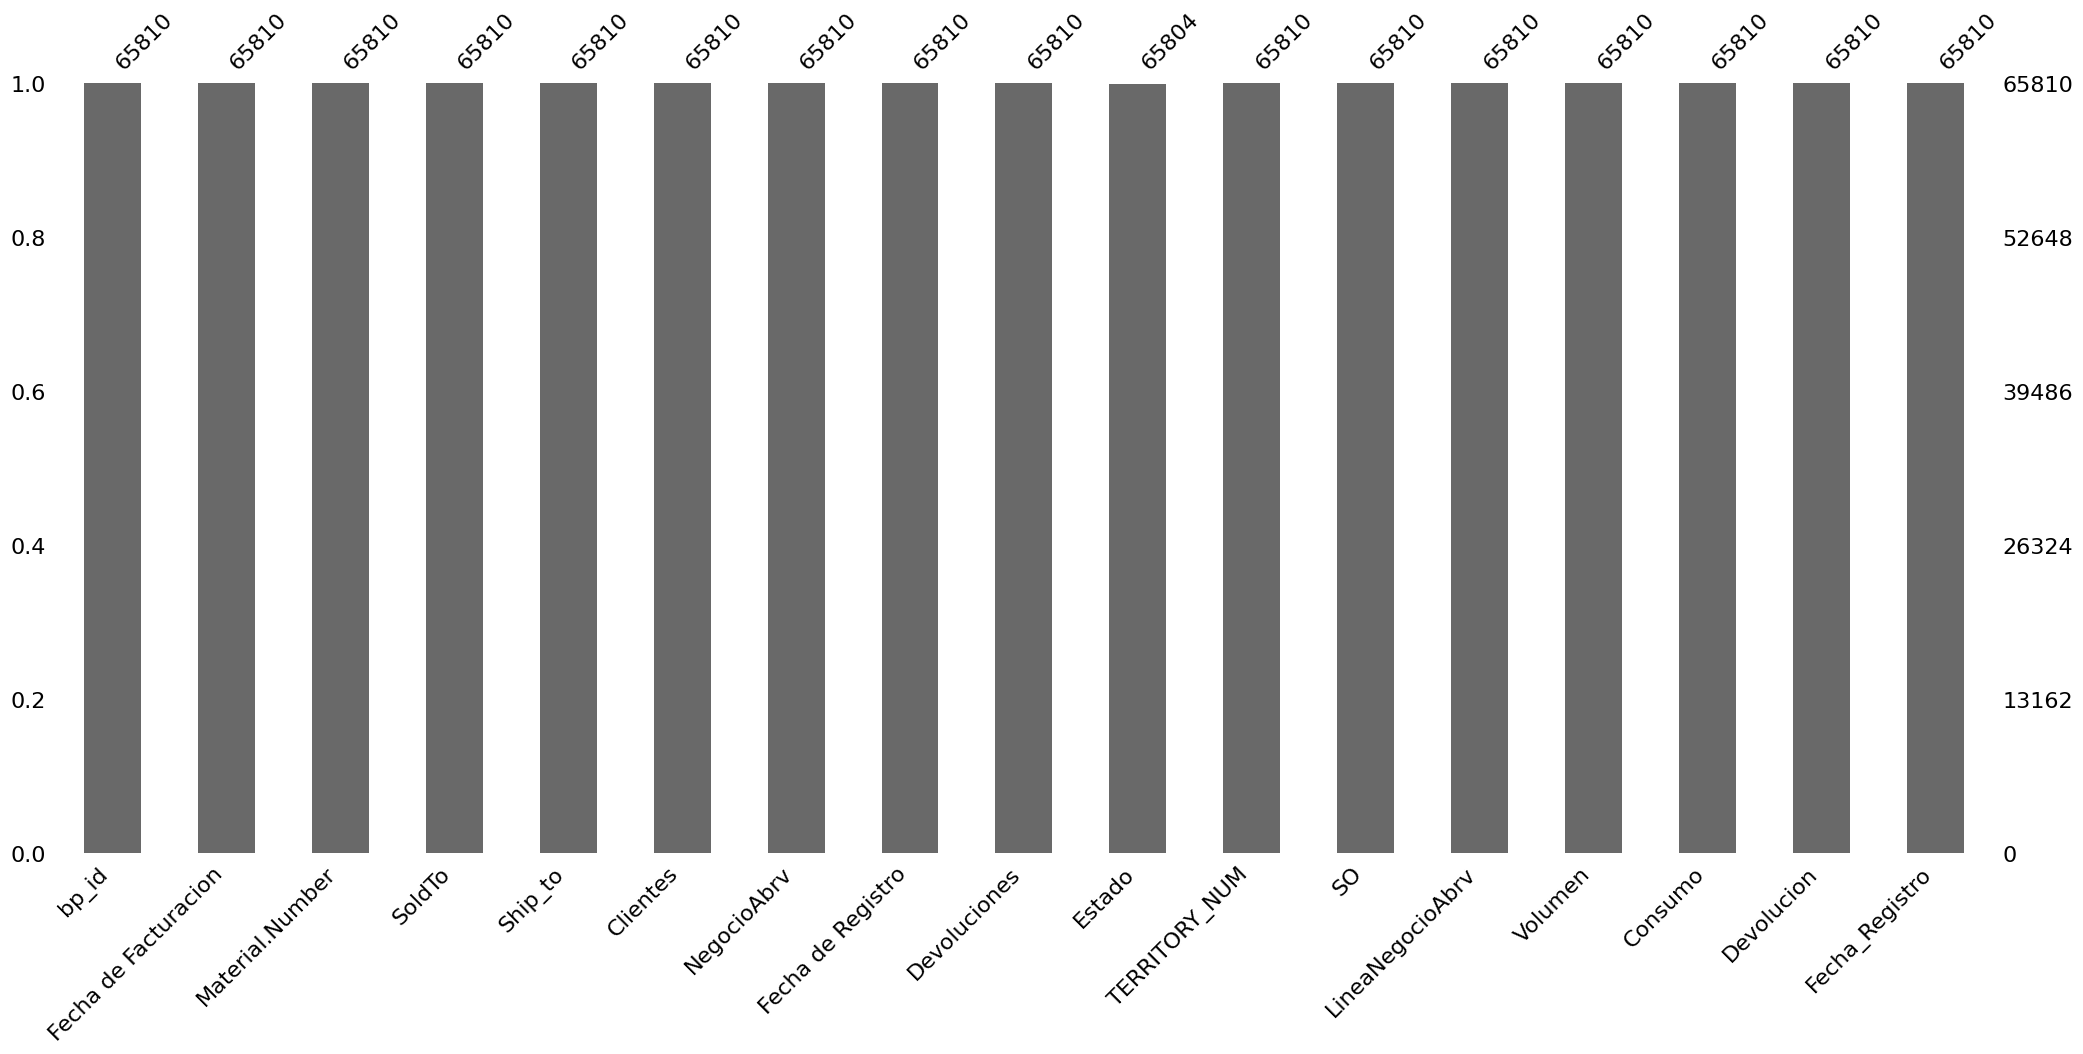

In [58]:
msno.bar(df_clientes)

### Se agrega el dato de material mas comprado por cliente

In [59]:
## Se agrega el dato de material mas comprado por cliente
modaMaterial = df_clientes.groupby('bp_id')['Material.Number'].apply(lambda x: x.mode().iloc[0]).reset_index()

## Se incorpora al nuevo dataframe.

df_clientes = df_clientes.merge(modaMaterial, on='bp_id', how='left') 
df_clientes.rename(columns={'Material.Number_y': 'Material.Number'}, inplace=True)

Tratamiento de fechas de registro

In [60]:
# Encontrar la fecha más reciente para cada 'SoldTo'
fecha_mas_reciente = df_clientes.groupby(['bp_id'])['Fecha de Registro'].max().reset_index()

In [61]:
df_clientes = df_clientes.merge(fecha_mas_reciente, on='bp_id', how='left')
# df_clientes.rename(columns={'Fecha de Registro_x': 'FechaRegistro'}, inplace=True)

# df_clientes['FechaRegistro'].drop()

df_clientes['Estado'] = df_clientes.groupby('bp_id')['Estado'].transform('last')
df_clientes['Territorio'] = df_clientes.groupby('bp_id')['TERRITORY_NUM'].transform('last')


df_clientes

bp_id Fecha de Facturacion Material.Number_x    SoldTo   Ship_to  \
0      21107279           09/01/2020             65753    500060    500060   
1      21107733           09/01/2020             62285    500258    500258   
2      21278743           09/01/2020             58075  10303065  10303065   
3      21107733           09/01/2020             20151    500258  10280614   
4      21107420           09/01/2020             26868  10147528  10254519   
...         ...                  ...               ...       ...       ...   
65805  21374114           09/01/2024             40749  10331375  10332120   
65806  21374114           09/01/2024             39964  10331375  10332120   
65807  21335589           07/02/2024             19544  10317368  10318179   
65808  21109322           07/02/2024             26867  10163622  10163622   
65809  21330867           07/02/2024             64791  10315656  10315656   

                             Clientes NegocioAbrv Fecha de Registro_x  \
0      PROVEEDORA AGRICOLA DE TECOMAN          FG          17/11/2017   
1              AGROINSUMOS DEL CENTRO          FG          17/11/2017   
2            MARIA TERESA SOLIS RAMOS          IN          20/05/2019   
3              AGROINSUMOS DEL CENTRO          HS          17/11/2017   
4                           AFM AGROS          IN          17/11/2017   
...                               ...         ...                 ...   
65805             ZITA ROSAS MARTINEZ          FG          18/11/2020   
65806             ZITA ROSAS MARTINEZ          FG          18/11/2020   
65807           FERTILIZANTES TEPEYAC          OT          01/04/2020   
65808        AGROQUIMICOS DE SAN LUIS          HS          17/11/2017   
65809             JOEL GARCIA SERAFIN          IN          06/03/2020   

      Devoluciones Estado TERRITORY_NUM   SO LineaNegocioAbrv Volumen  \
0                0    COL        A9442C  3CR               FG     180   
1                0    QUE        A9522D  3CR               FG      60   
2                0    JAL        A5342F  3CR               IN       4   
3                0    QUE        A9522D  3CR               HS     240   
4                0    MIC        A9472K  3CR               IN    16.2   
...            ...    ...           ...  ...              ...     ...   
65805            1    VER        A5542F  3CR               FG     -10   
65806            1    VER        A5542F  3CR               FG     -12   
65807            1    SON        A9602H  3CR               OT     -72   
65808            1    SON        A9572D  3CR               HS  -21.12   
65809            1    NAY        A9602I  3CR               IN    -3.6   

          Consumo  Devolucion Fecha_Registro Material.Number  \
0       185433.21           0     17/11/2017           39964   
1        90094.28           0     17/11/2017         1001368   
2         5720.36           0     20/05/2019           13175   
3        49012.41           0     17/11/2017         1001368   
4        43702.67           0     17/11/2017           24728   
...           ...         ...            ...             ...   
65805    -4869.14           1     18/11/2020           15096   
65806     -6142.8           1     18/11/2020           15096   
65807           0           1     01/04/2020           55475   
65808  -186689.17           1     17/11/2017           55475   
65809      -19546           1     06/03/2020           58075   

      Fecha de Registro_y Territorio  
0              17/11/2017     A9442C  
1              17/11/2017     A9522D  
2              20/05/2019     A5342F  
3              17/11/2017     A9522D  
4              17/11/2017     A9472K  
...                   ...        ...  
65805          18/11/2020     A5542F  
65806          18/11/2020     A5542F  
65807          01/04/2020     A9602H  
65808          17/11/2017     A9572D  
65809          06/03/2020     A9602I  

[65810 rows x 20 columns]

### Pre-EDA

In [62]:
df_clientes.shape

(65810, 20)

In [63]:
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65810 entries, 0 to 65809
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   bp_id                 65810 non-null  object
 1   Fecha de Facturacion  65810 non-null  object
 2   Material.Number_x     65810 non-null  object
 3   SoldTo                65810 non-null  object
 4   Ship_to               65810 non-null  object
 5   Clientes              65810 non-null  object
 6   NegocioAbrv           65810 non-null  object
 7   Fecha de Registro_x   65810 non-null  object
 8   Devoluciones          65810 non-null  object
 9   Estado                65804 non-null  object
 10  TERRITORY_NUM         65810 non-null  object
 11  SO                    65810 non-null  object
 12  LineaNegocioAbrv      65810 non-null  object
 13  Volumen               65810 non-null  object
 14  Consumo               65810 non-null  object
 15  Devolucion            65810 non-null

In [64]:
df_clientes.columns.values

array(['bp_id', 'Fecha de Facturacion', 'Material.Number_x', 'SoldTo',
       'Ship_to', 'Clientes', 'NegocioAbrv', 'Fecha de Registro_x',
       'Devoluciones', 'Estado', 'TERRITORY_NUM', 'SO',
       'LineaNegocioAbrv', 'Volumen', 'Consumo', 'Devolucion',
       'Fecha_Registro', 'Material.Number', 'Fecha de Registro_y',
       'Territorio'], dtype=object)

In [65]:
df_clientes.dtypes

bp_id                   object
Fecha de Facturacion    object
Material.Number_x       object
SoldTo                  object
Ship_to                 object
Clientes                object
NegocioAbrv             object
Fecha de Registro_x     object
Devoluciones            object
Estado                  object
TERRITORY_NUM           object
SO                      object
LineaNegocioAbrv        object
Volumen                 object
Consumo                 object
Devolucion               int64
Fecha_Registro          object
Material.Number         object
Fecha de Registro_y     object
Territorio              object
dtype: object

#### Valores Faltantes.

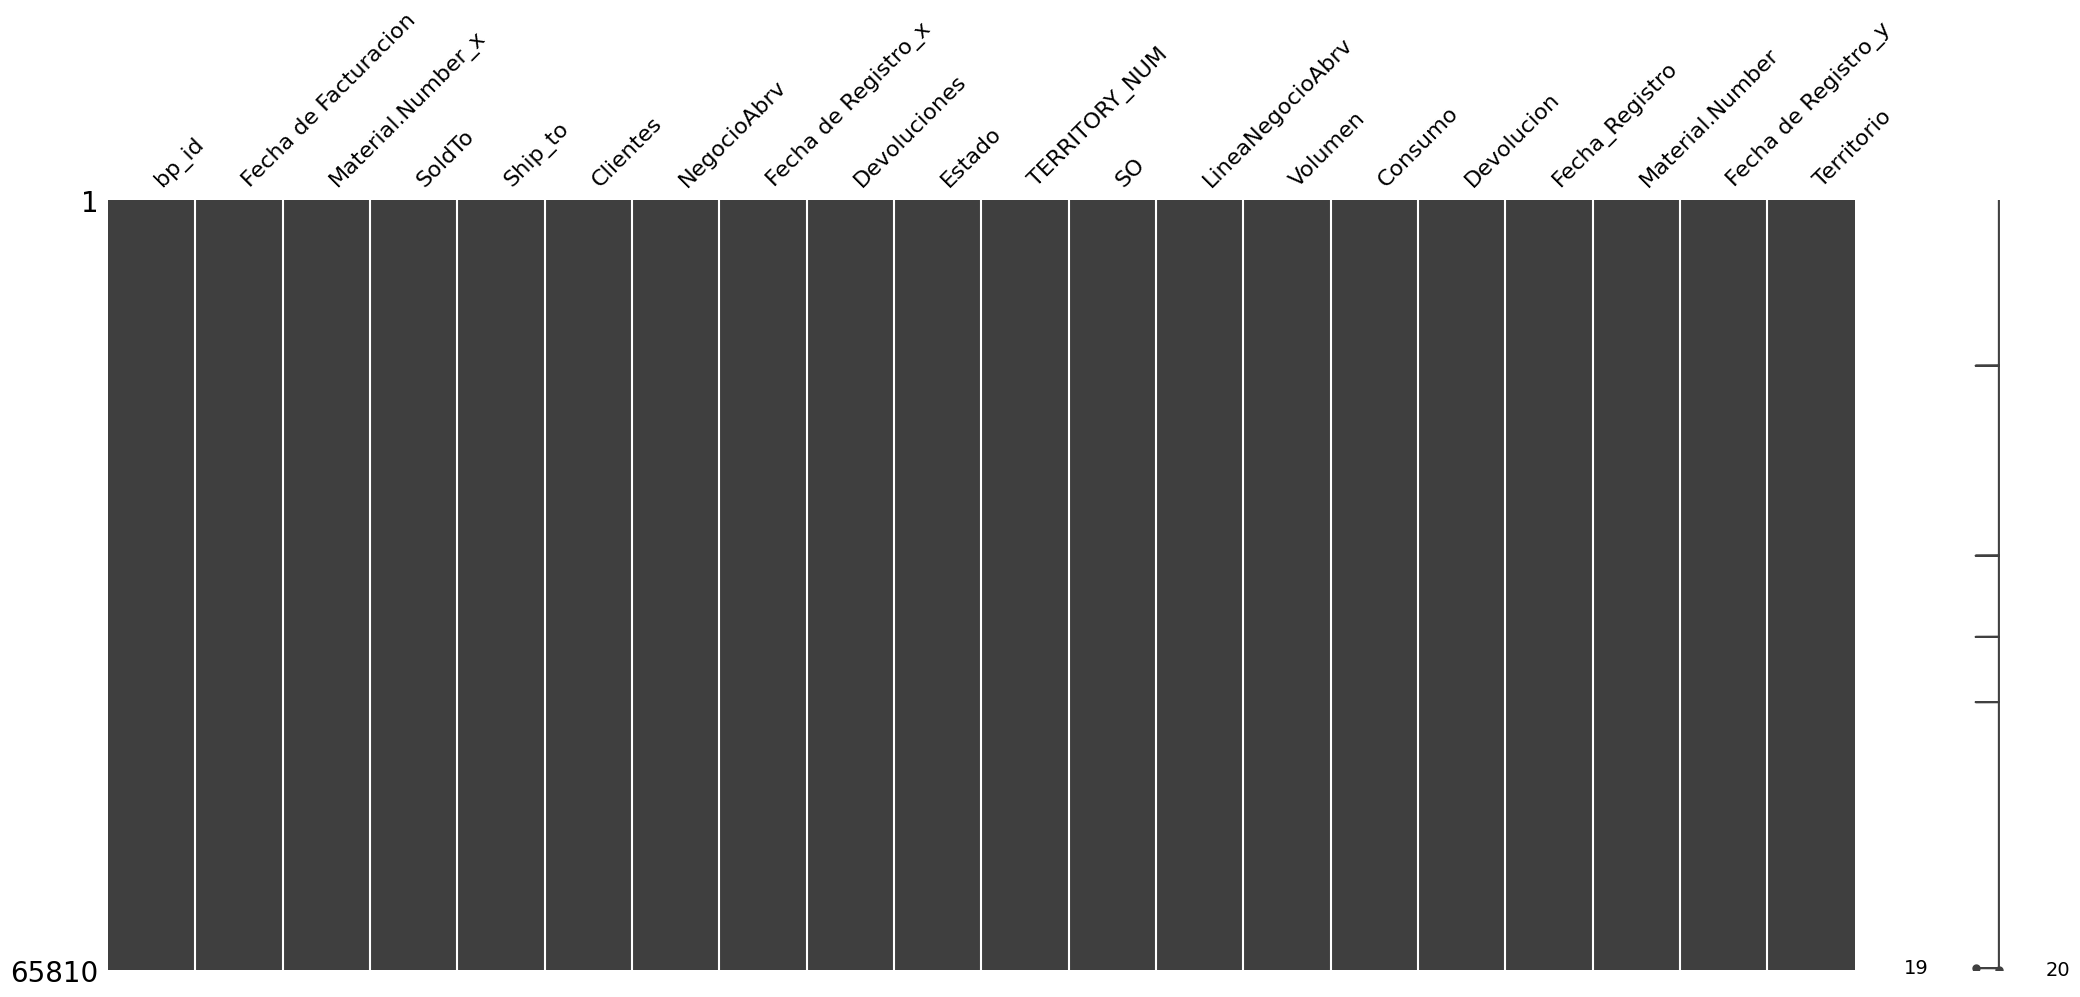

In [66]:
msno.matrix(df_clientes);

### Agregamos el dato de material más comprado:

### Ordenamos los datos por cliente y fecha

In [67]:

### Encontrar la fecha mas reciente para cada 'bp_id' 
### Esto porque puede que un sold to tenga mas de una fecha de registro

fecha_mas_reciente = df_clientes.groupby(['bp_id'])['Fecha_Registro'].max().reset_index()

# Unimos la variable fecha_mas_reciente

df_clientes = df_clientes.merge(fecha_mas_reciente, on='bp_id', how='left')
df_clientes.rename(columns={'Fecha_Registro_y': 'FechaRegistro'}, inplace=True)

In [68]:
df_clientes = df_clientes.sort_values(['Fecha de Facturacion'])
df_clientes

bp_id Fecha de Facturacion Material.Number_x    SoldTo   Ship_to  \
18304  21107383           02/02/2021             68741  10147416  10147416   
18308  21108755           02/02/2021             17335    500064    500064   
18307  21107383           02/02/2021             32695  10147416  10147416   
18306  21109190           02/02/2021             41930  10231265  10231265   
18305  21107383           02/02/2021             56277  10147416  10147416   
...         ...                  ...               ...       ...       ...   
36373  21428220           31/03/2020             58075  10104245  10283041   
40588  21236707           31/03/2023             32712  10287883  10289711   
40589  21236707           31/03/2023             32712  10287883  10289711   
40590  21335589           31/03/2023             32712  10317368  10318160   
40591  21109190           31/03/2023             32712  10231265  10231265   

                                           Clientes NegocioAbrv  \
18304                                AGRO DEL LLANO          HS   
18308                      RAFAEL CONTRERAS AGUILAR          IN   
18307                                AGRO DEL LLANO          FG   
18306                   INSUMOS FLORES DEL PACIFICO          IN   
18305                                AGRO DEL LLANO          IN   
...                                             ...         ...   
36373  COMERCIALIZADORA DE AGROSERVICIOS DEL BALSAS          IN   
40588           FERTILIZANTES DE LA COSTA ATLANTICA          HN   
40589           FERTILIZANTES DE LA COSTA ATLANTICA          HN   
40590                         FERTILIZANTES TEPEYAC          HN   
40591                   INSUMOS FLORES DEL PACIFICO          HN   

      Fecha de Registro_x Devoluciones Estado  ...   SO LineaNegocioAbrv  \
18304          17/11/2017            0    JAL  ...  3CR               HS   
18308          17/11/2017            0    JAL  ...  3CR               IN   
18307          17/11/2017            0    JAL  ...  3CR               FG   
18306          17/11/2017            0    SIN  ...  3CR               IN   
18305          17/11/2017            0    JAL  ...  3CR               IN   
...                   ...          ...    ...  ...  ...              ...   
36373          16/02/2021            0    GRO  ...  3CR               IN   
40588          19/06/2018            1    VER  ...  3CR               HN   
40589          19/06/2018            0    VER  ...  3CR               HN   
40590          01/04/2020            0    SON  ...  3CR               HN   
40591          17/11/2017            0    SIN  ...  3CR               HN   

      Volumen     Consumo Devolucion  Fecha_Registro_x Material.Number  \
18304      36    18055.44          0        17/11/2017         1001368   
18308     336   251220.61          0        17/11/2017           13215   
18307       2     5428.57          0        17/11/2017         1001368   
18306      60   107599.93          0        17/11/2017           64791   
18305      60    75817.34          0        17/11/2017         1001368   
...       ...         ...        ...               ...             ...   
36373      12    14587.97          0        16/02/2021           64791   
40588   -5000  -1227328.3          1        19/06/2018           32712   
40589    5000  1227328.34          0        19/06/2018           32712   
40590    3480   740887.62          0        01/04/2020           55475   
40591    3000    510956.8          0        17/11/2017           64791   

      Fecha de Registro_y Territorio FechaRegistro  
18304          17/11/2017     A9442D    17/11/2017  
18308          17/11/2017     A9442D    17/11/2017  
18307          17/11/2017     A9442D    17/11/2017  
18306          17/11/2017     A9602K    17/11/2017  
18305          17/11/2017     A9442D    17/11/2017  
...                   ...        ...           ...  
36373          16/02/2021     A9352A    16/02/2021  
40588          19/06/2018     A9582F    19

In [69]:
# df_clientes['Fecha']

### Hacemos los siguiente para la variable Estado.

In [70]:

df_clientes['Estado'] = df_clientes.groupby('bp_id')['Estado'].transform('last')
df_clientes['Territorio'] = df_clientes.groupby('bp_id')['TERRITORY_NUM'].transform('last')

<Axes: >

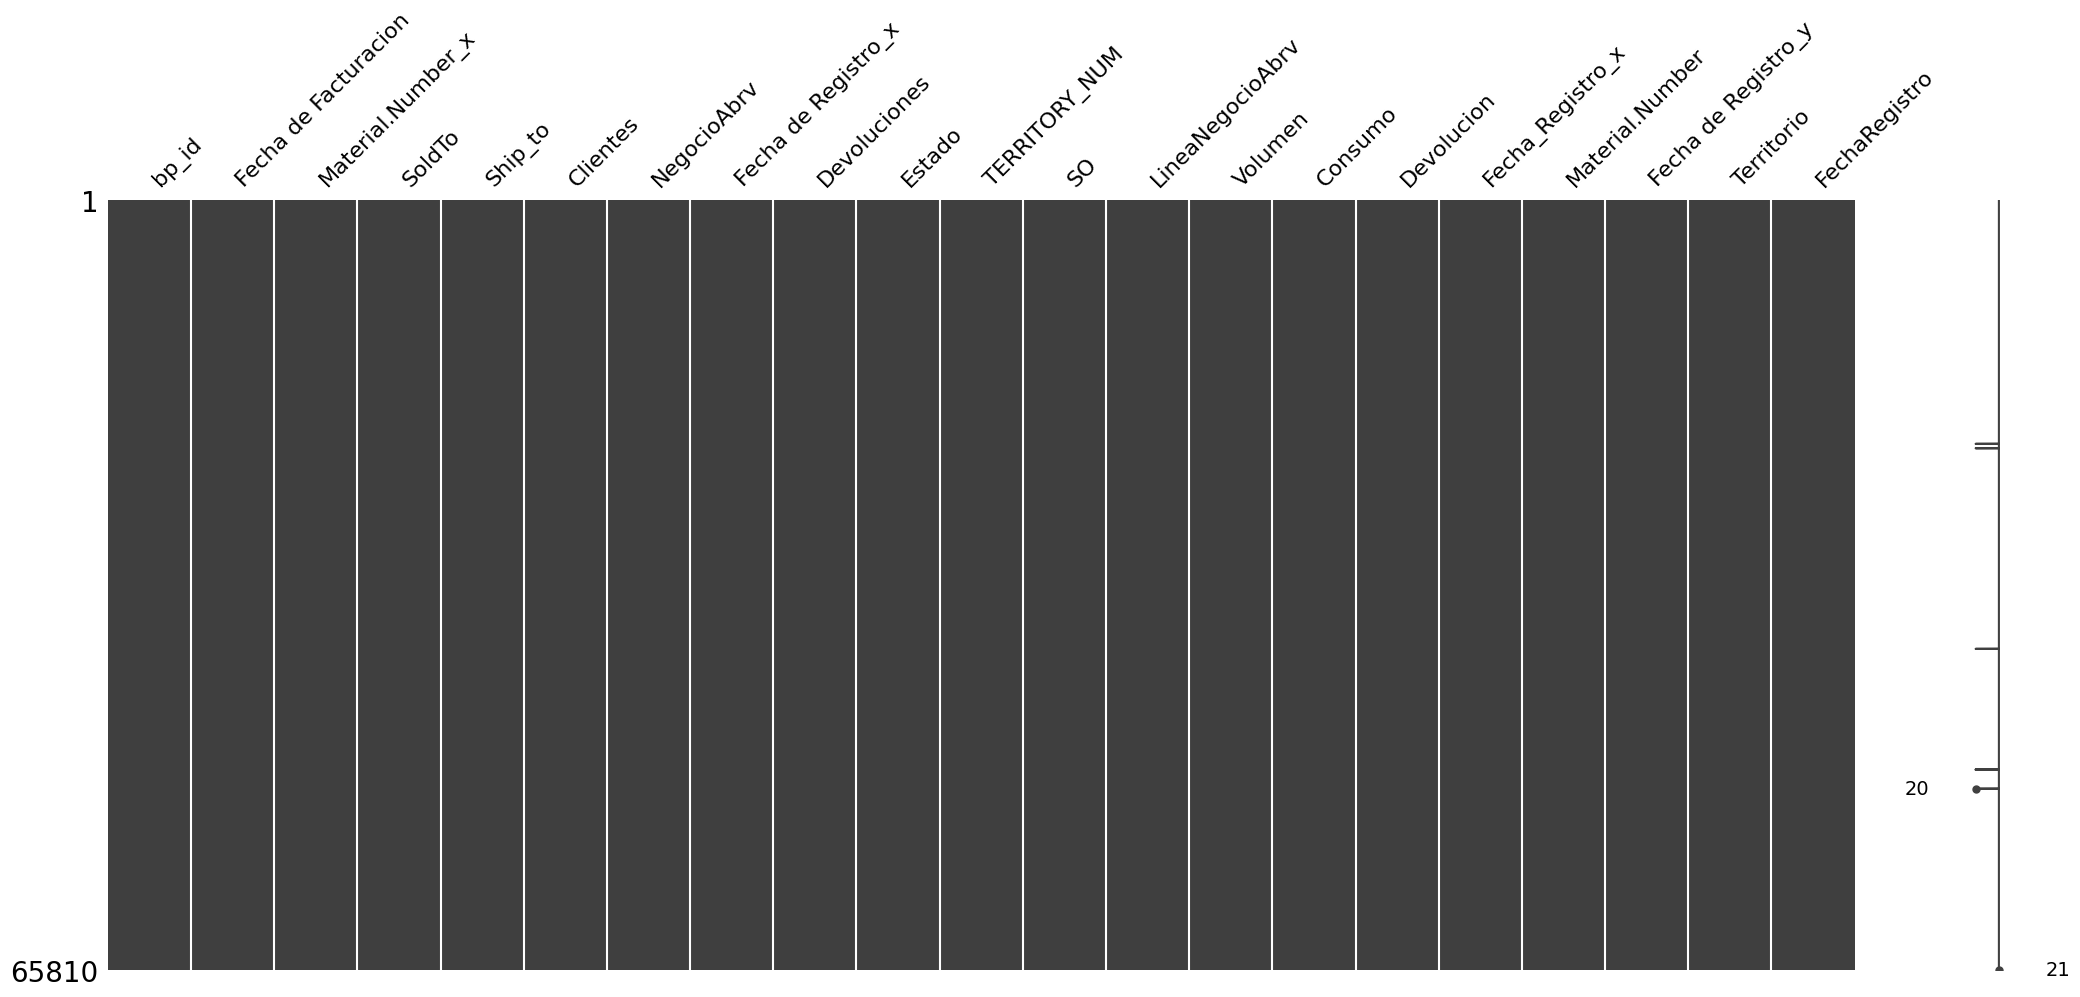

In [71]:
msno.matrix(df_clientes)

## Trasformamos el tipo datetime a Fecha de Facturacion

In [72]:
df_clientes['Fecha de Facturacion'] = pd.to_datetime(df_clientes['Fecha de Facturacion'])
df_clientes

C:\Users\carlo\AppData\Local\Temp\ipykernel_21064\1913885933.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_clientes['Fecha de Facturacion'] = pd.to_datetime(df_clientes['Fecha de Facturacion'])


bp_id Fecha de Facturacion Material.Number_x    SoldTo   Ship_to  \
18304  21107383           2021-02-02             68741  10147416  10147416   
18308  21108755           2021-02-02             17335    500064    500064   
18307  21107383           2021-02-02             32695  10147416  10147416   
18306  21109190           2021-02-02             41930  10231265  10231265   
18305  21107383           2021-02-02             56277  10147416  10147416   
...         ...                  ...               ...       ...       ...   
36373  21428220           2020-03-31             58075  10104245  10283041   
40588  21236707           2023-03-31             32712  10287883  10289711   
40589  21236707           2023-03-31             32712  10287883  10289711   
40590  21335589           2023-03-31             32712  10317368  10318160   
40591  21109190           2023-03-31             32712  10231265  10231265   

                                           Clientes NegocioAbrv  \
18304                                AGRO DEL LLANO          HS   
18308                      RAFAEL CONTRERAS AGUILAR          IN   
18307                                AGRO DEL LLANO          FG   
18306                   INSUMOS FLORES DEL PACIFICO          IN   
18305                                AGRO DEL LLANO          IN   
...                                             ...         ...   
36373  COMERCIALIZADORA DE AGROSERVICIOS DEL BALSAS          IN   
40588           FERTILIZANTES DE LA COSTA ATLANTICA          HN   
40589           FERTILIZANTES DE LA COSTA ATLANTICA          HN   
40590                         FERTILIZANTES TEPEYAC          HN   
40591                   INSUMOS FLORES DEL PACIFICO          HN   

      Fecha de Registro_x Devoluciones Estado  ...   SO LineaNegocioAbrv  \
18304          17/11/2017            0    JAL  ...  3CR               HS   
18308          17/11/2017            0    JAL  ...  3CR               IN   
18307          17/11/2017            0    JAL  ...  3CR               FG   
18306          17/11/2017            0    SIN  ...  3CR               IN   
18305          17/11/2017            0    JAL  ...  3CR               IN   
...                   ...          ...    ...  ...  ...              ...   
36373          16/02/2021            0    GRO  ...  3CR               IN   
40588          19/06/2018            1    VER  ...  3CR               HN   
40589          19/06/2018            0    VER  ...  3CR               HN   
40590          01/04/2020            0    SON  ...  3CR               HN   
40591          17/11/2017            0    SIN  ...  3CR               HN   

      Volumen     Consumo Devolucion  Fecha_Registro_x Material.Number  \
18304      36    18055.44          0        17/11/2017         1001368   
18308     336   251220.61          0        17/11/2017           13215   
18307       2     5428.57          0        17/11/2017         1001368   
18306      60   107599.93          0        17/11/2017           64791   
18305      60    75817.34          0        17/11/2017         1001368   
...       ...         ...        ...               ...             ...   
36373      12    14587.97          0        16/02/2021           64791   
40588   -5000  -1227328.3          1        19/06/2018           32712   
40589    5000  1227328.34          0        19/06/2018           32712   
40590    3480   740887.62          0        01/04/2020           55475   
40591    3000    510956.8          0        17/11/2017           64791   

      Fecha de Registro_y Territorio FechaRegistro  
18304          17/11/2017     A9442D    17/11/2017  
18308          17/11/2017     A9442D    17/11/2017  
18307          17/11/2017     A9442D    17/11/2017  
18306          17/11/2017     A9602K    17/11/2017  
18305          17/11/2017     A9442D    17/11/2017  
...                   ...        ...           ...  
36373          16/02/2021     A9352C    16/02/2021  
40588          19/06/2018     A9582F    19

In [73]:
df_clientes = df_clientes.sort_values(['bp_id', 'Fecha de Facturacion'])

<Axes: >

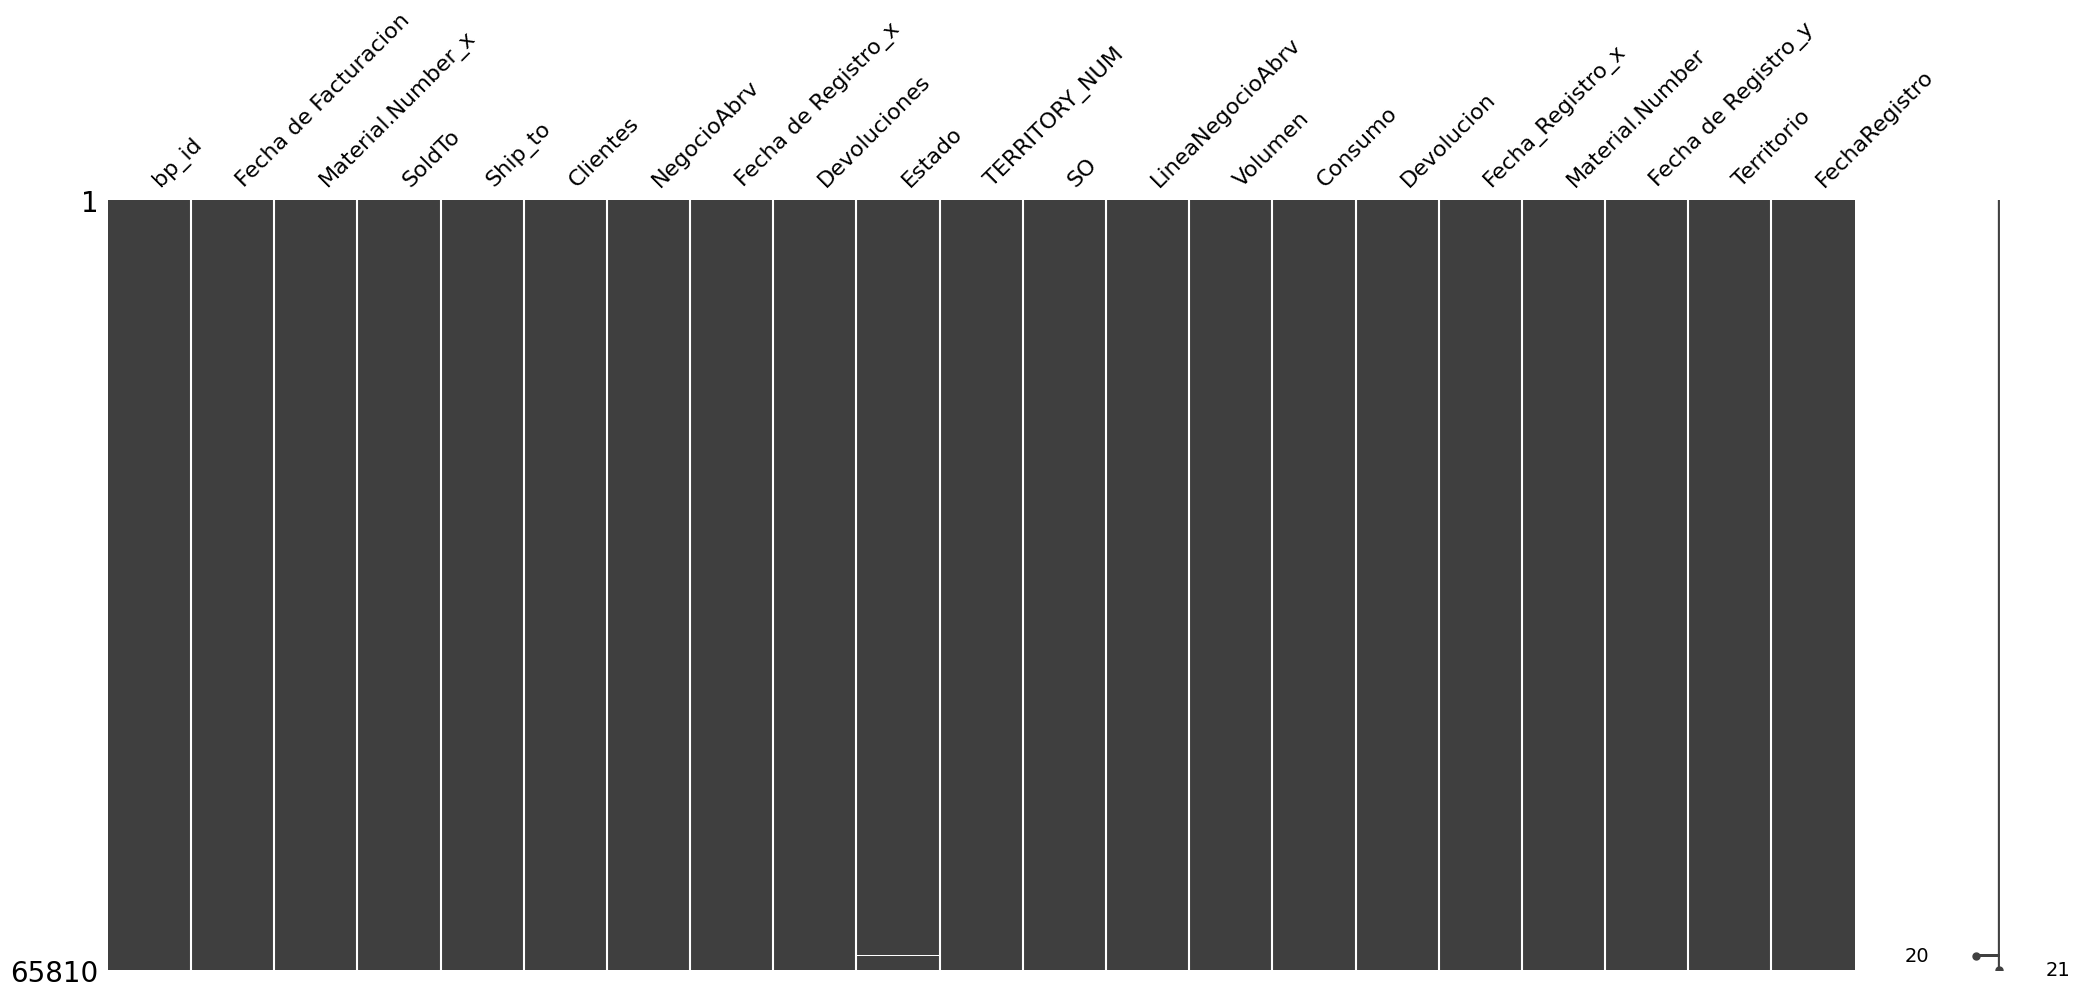

In [74]:
msno.matrix(df_clientes)

## Data manipulation.

Estas son algunas de las variables categoricas y númericas que estaremos Calculando:

*   Compró ese mes.
*   Media movil de compró
*   Media movil de consumo por SoldTo.
*   Media movil de volumen por SoldTo
*   Diferencia en meses entre la última compra y ahora.
*   Frecuencia de compra.

Calculamos la frecuencia de compra:

### Armamos la variable Date_Last para calcular la ultima fecha de facturacion.

<Axes: >

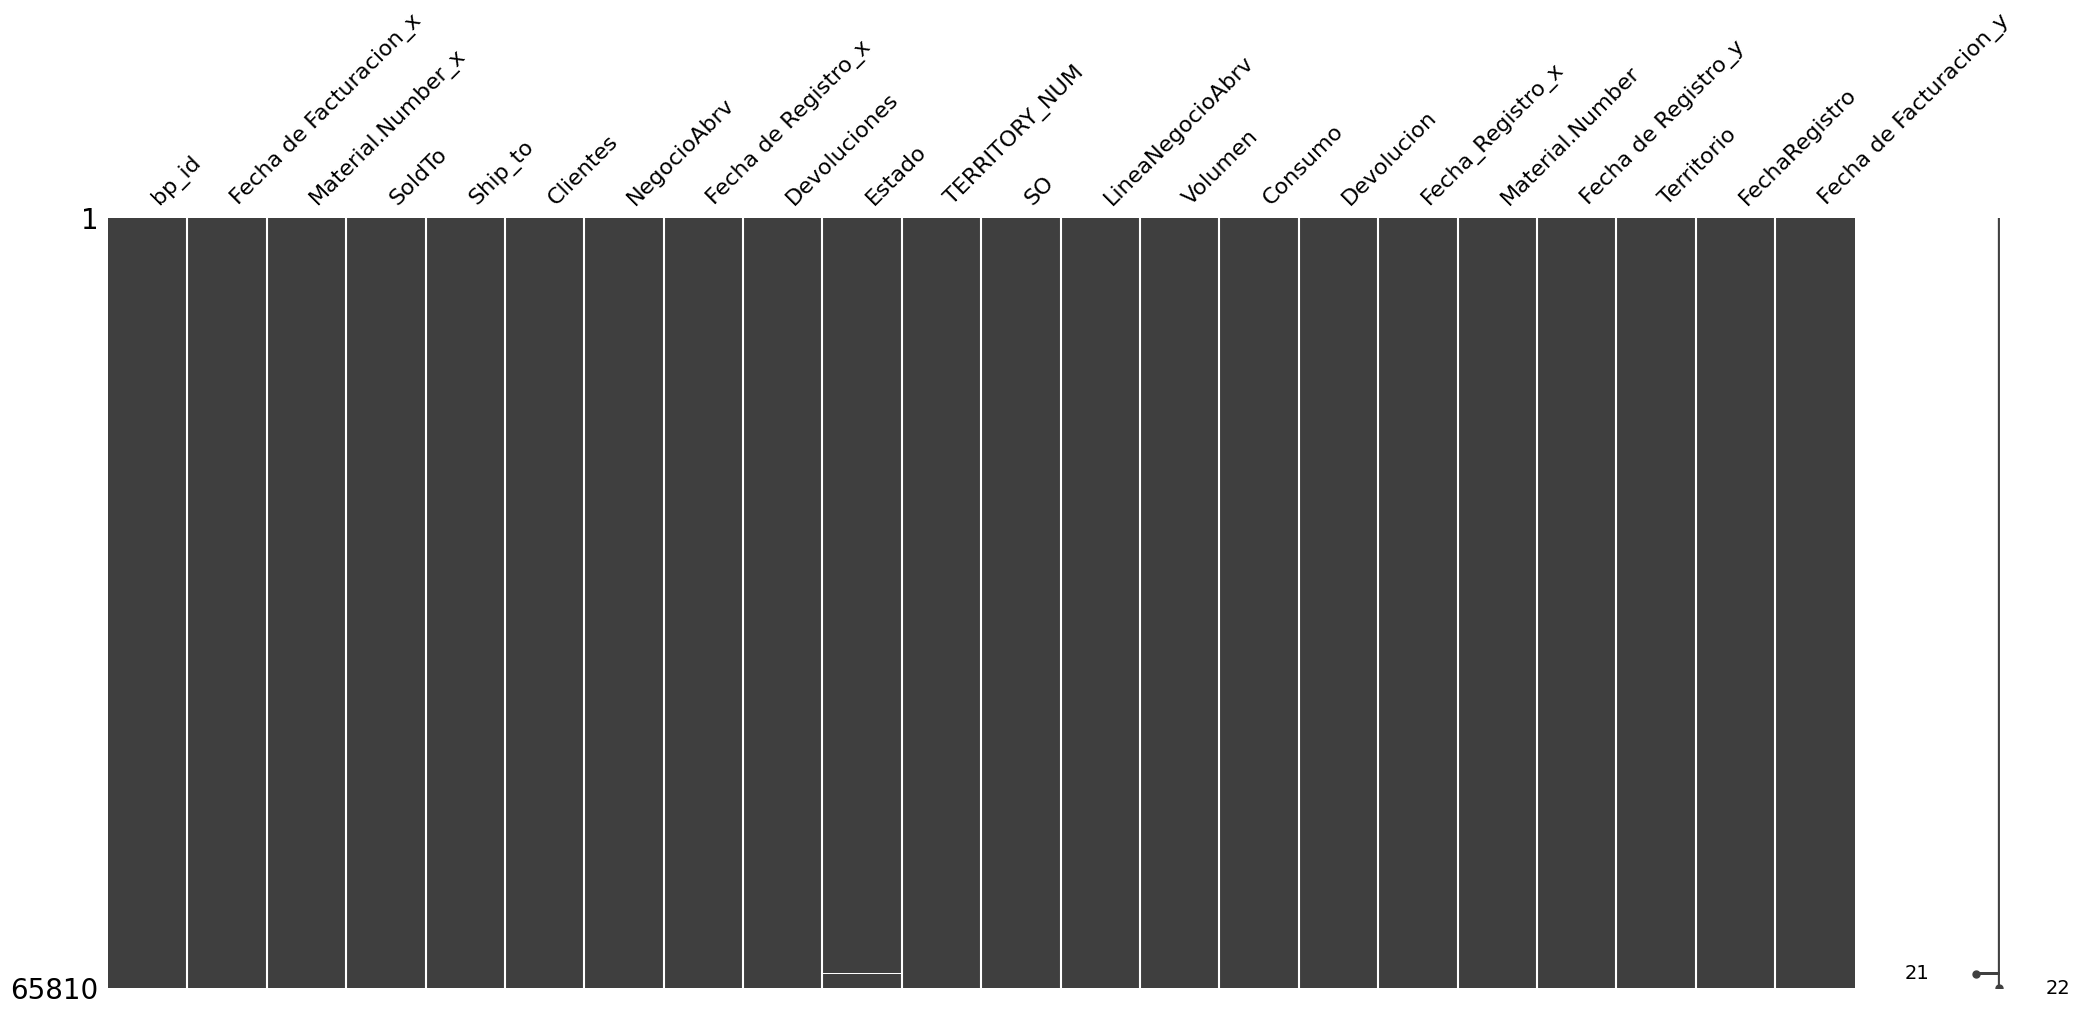

In [75]:
Date_Last = df_clientes.groupby(['bp_id'])['Fecha de Facturacion'].max().reset_index()
df_clientes = df_clientes.merge(Date_Last, on='bp_id', how='left')
msno.matrix(df_clientes)

In [76]:
df_clientes.rename(columns={'Fecha de Facturacion_y': 'Date_Last'}, inplace=True)
df_clientes

bp_id Fecha de Facturacion_x Material.Number_x    SoldTo   Ship_to  \
0      21107235             2020-02-17             20151  10098325  10098325   
1      21107235             2020-02-17             66545  10098325  10098325   
2      21107235             2020-02-17             57553  10098325  10098325   
3      21107235             2020-02-17             32722  10098325  10098325   
4      21107235             2020-02-17             61499  10098325  10098325   
...         ...                    ...               ...       ...       ...   
65805  26045521             2024-06-03             13175  10380568  10380697   
65806  26045521             2024-06-03             71298  10380568  10380697   
65807  26045521             2024-08-03             73262  10380568  10380697   
65808  26045521             2024-08-03             43950  10380568  10380697   
65809  26085323             2024-03-27             78940  10382201  10382201   

                                Clientes NegocioAbrv Fecha de Registro_x  \
0                          AM ROMA Y CIA          HS          17/11/2017   
1                          AM ROMA Y CIA          OT          17/11/2017   
2                          AM ROMA Y CIA          ST          17/11/2017   
3                          AM ROMA Y CIA          IN          17/11/2017   
4                          AM ROMA Y CIA          FG          17/11/2017   
...                                  ...         ...                 ...   
65805  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65806  IRVING MELESIO GUERRERO HERNANDEZ          FG          16/02/2024   
65807  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65808  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65809                RUBEN BIGURRA PROOM          HN          25/03/2024   

      Devoluciones Estado  ... LineaNegocioAbrv Volumen    Consumo Devolucion  \
0                0    CMX  ...               HS     120   25377.39          0   
1                0    CMX  ...               OT     100   15597.79          0   
2                0    CMX  ...               ST      84  120115.88          0   
3                0    CMX  ...               IN      15   10420.03          0   
4                0    CMX  ...               FG      48    36157.4          0   
...            ...    ...  ...              ...     ...        ...        ...   
65805            0    PUE  ...               IN      12   17228.16          0   
65806            0    PUE  ...               FG      12   11349.68          0   
65807            0    PUE  ...               IN      20     524.85          0   
65808            0    PUE  ...               IN       3    6916.52          0   
65809            0    VER  ...               HN    5000  474997.12          0   

      Fecha_Registro_x  Material.Number Fecha de Registro_y Territorio  \
0           17/11/2017            57553          17/11/2017     A5442B   
1           17/11/2017            57553          17/11/2017     A5442B   
2           17/11/2017            57553          17/11/2017     A5442B   
3           17/11/2017            57553          17/11/2017     A5442B   
4           17/11/2017            57553          17/11/2017     A5442B   
...                ...              ...                 ...        ...   
65805       16/02/2024            73262          16/02/2024     A9512A   
65806       16/02/2024            73262          16/02/2024     A9512A   
65807       16/02/2024            73262          16/02/2024     A9512A   
65808       16/02/2024            73262          16/02/2024     A9512A   
65809       25/03/2024            78940          25/03/2024     A5542D   

      FechaRegistro  Date_Last  
0        17/11/2017 2023-12-01  
1        17/11/2017 2023-12-01  
2        17/11/2017 2023-12-01  
3        17/11/2017 2023-12-01  
4        17/11/2017 2023-12-01  
...             ...        ...  
65805    16/02/2024 2024-08-03  
65806    1

## Se agrega el dato de Temporada.

In [77]:
df_clientes['Temporada_Temp'] = np.where(
    (
        (df_clientes['Fecha de Facturacion_x'].dt.month == 9) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 10) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 11) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 12) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 1) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 2) |
        (df_clientes['Fecha de Facturacion_x'].dt.month == 3)
    ),
    'OI',
    'PV'
)

Temporadas = df_clientes.groupby('bp_id')['Temporada_Temp'].apply(lambda x: x.mode().iloc[0]).reset_index()

df_clientes = df_clientes.merge(Temporadas, on = 'bp_id', how='left')
df_clientes.rename(columns={'Temporada_Temp_y': 'Temporada'}, inplace=True)

df_clientes

bp_id Fecha de Facturacion_x Material.Number_x    SoldTo   Ship_to  \
0      21107235             2020-02-17             20151  10098325  10098325   
1      21107235             2020-02-17             66545  10098325  10098325   
2      21107235             2020-02-17             57553  10098325  10098325   
3      21107235             2020-02-17             32722  10098325  10098325   
4      21107235             2020-02-17             61499  10098325  10098325   
...         ...                    ...               ...       ...       ...   
65805  26045521             2024-06-03             13175  10380568  10380697   
65806  26045521             2024-06-03             71298  10380568  10380697   
65807  26045521             2024-08-03             73262  10380568  10380697   
65808  26045521             2024-08-03             43950  10380568  10380697   
65809  26085323             2024-03-27             78940  10382201  10382201   

                                Clientes NegocioAbrv Fecha de Registro_x  \
0                          AM ROMA Y CIA          HS          17/11/2017   
1                          AM ROMA Y CIA          OT          17/11/2017   
2                          AM ROMA Y CIA          ST          17/11/2017   
3                          AM ROMA Y CIA          IN          17/11/2017   
4                          AM ROMA Y CIA          FG          17/11/2017   
...                                  ...         ...                 ...   
65805  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65806  IRVING MELESIO GUERRERO HERNANDEZ          FG          16/02/2024   
65807  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65808  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65809                RUBEN BIGURRA PROOM          HN          25/03/2024   

      Devoluciones Estado  ...    Consumo Devolucion Fecha_Registro_x  \
0                0    CMX  ...   25377.39          0       17/11/2017   
1                0    CMX  ...   15597.79          0       17/11/2017   
2                0    CMX  ...  120115.88          0       17/11/2017   
3                0    CMX  ...   10420.03          0       17/11/2017   
4                0    CMX  ...    36157.4          0       17/11/2017   
...            ...    ...  ...        ...        ...              ...   
65805            0    PUE  ...   17228.16          0       16/02/2024   
65806            0    PUE  ...   11349.68          0       16/02/2024   
65807            0    PUE  ...     524.85          0       16/02/2024   
65808            0    PUE  ...    6916.52          0       16/02/2024   
65809            0    VER  ...  474997.12          0       25/03/2024   

      Material.Number Fecha de Registro_y  Territorio FechaRegistro  \
0               57553          17/11/2017      A5442B    17/11/2017   
1               57553          17/11/2017      A5442B    17/11/2017   
2               57553          17/11/2017      A5442B    17/11/2017   
3               57553          17/11/2017      A5442B    17/11/2017   
4               57553          17/11/2017      A5442B    17/11/2017   
...               ...                 ...         ...           ...   
65805           73262          16/02/2024      A9512A    16/02/2024   
65806           73262          16/02/2024      A9512A    16/02/2024   
65807           73262          16/02/2024      A9512A    16/02/2024   
65808           73262          16/02/2024      A9512A    16/02/2024   
65809           78940          25/03/2024      A5542D    25/03/2024   

       Date_Last Temporada_Temp_x Temporada  
0     2023-12-01               OI        OI  
1     2023-12-01               OI        OI  
2     2023-12-01               OI        OI  
3     2023-12-01               OI        OI  
4     2023-12-01               OI        OI  
...          ...              ...       ...  
65805 2024-08-03               PV        OI  
65806 2024-08-03               PV     

### Se agrega el dato de Organizacion de ventas

In [78]:
SO_Temp = df_clientes.groupby('bp_id')['SO'].apply(lambda x: x.mode().iloc[0]).reset_index()
df_clientes = df_clientes.merge(SO_Temp, on = 'bp_id', how='left')
df_clientes.rename(columns={'SO_y': 'SO'}, inplace=True)

df_clientes

bp_id Fecha de Facturacion_x Material.Number_x    SoldTo   Ship_to  \
0      21107235             2020-02-17             20151  10098325  10098325   
1      21107235             2020-02-17             66545  10098325  10098325   
2      21107235             2020-02-17             57553  10098325  10098325   
3      21107235             2020-02-17             32722  10098325  10098325   
4      21107235             2020-02-17             61499  10098325  10098325   
...         ...                    ...               ...       ...       ...   
65805  26045521             2024-06-03             13175  10380568  10380697   
65806  26045521             2024-06-03             71298  10380568  10380697   
65807  26045521             2024-08-03             73262  10380568  10380697   
65808  26045521             2024-08-03             43950  10380568  10380697   
65809  26085323             2024-03-27             78940  10382201  10382201   

                                Clientes NegocioAbrv Fecha de Registro_x  \
0                          AM ROMA Y CIA          HS          17/11/2017   
1                          AM ROMA Y CIA          OT          17/11/2017   
2                          AM ROMA Y CIA          ST          17/11/2017   
3                          AM ROMA Y CIA          IN          17/11/2017   
4                          AM ROMA Y CIA          FG          17/11/2017   
...                                  ...         ...                 ...   
65805  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65806  IRVING MELESIO GUERRERO HERNANDEZ          FG          16/02/2024   
65807  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65808  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65809                RUBEN BIGURRA PROOM          HN          25/03/2024   

      Devoluciones Estado  ... Devolucion Fecha_Registro_x Material.Number  \
0                0    CMX  ...          0       17/11/2017           57553   
1                0    CMX  ...          0       17/11/2017           57553   
2                0    CMX  ...          0       17/11/2017           57553   
3                0    CMX  ...          0       17/11/2017           57553   
4                0    CMX  ...          0       17/11/2017           57553   
...            ...    ...  ...        ...              ...             ...   
65805            0    PUE  ...          0       16/02/2024           73262   
65806            0    PUE  ...          0       16/02/2024           73262   
65807            0    PUE  ...          0       16/02/2024           73262   
65808            0    PUE  ...          0       16/02/2024           73262   
65809            0    VER  ...          0       25/03/2024           78940   

      Fecha de Registro_y Territorio  FechaRegistro  Date_Last  \
0              17/11/2017     A5442B     17/11/2017 2023-12-01   
1              17/11/2017     A5442B     17/11/2017 2023-12-01   
2              17/11/2017     A5442B     17/11/2017 2023-12-01   
3              17/11/2017     A5442B     17/11/2017 2023-12-01   
4              17/11/2017     A5442B     17/11/2017 2023-12-01   
...                   ...        ...            ...        ...   
65805          16/02/2024     A9512A     16/02/2024 2024-08-03   
65806          16/02/2024     A9512A     16/02/2024 2024-08-03   
65807          16/02/2024     A9512A     16/02/2024 2024-08-03   
65808          16/02/2024     A9512A     16/02/2024 2024-08-03   
65809          25/03/2024     A5542D     25/03/2024 2024-03-27   

      Temporada_Temp_x Temporada   SO  
0                   OI        OI  3CR  
1                   OI        OI  3CR  
2                   OI        OI  3CR  
3                   OI        OI  3CR  
4                   OI        OI  3CR  
...                ...       ...  ...  
65805               PV        OI  3CR  
65806               PV        OI  3CR  
65807               PV        OI  3CR  
65808 

<Axes: >

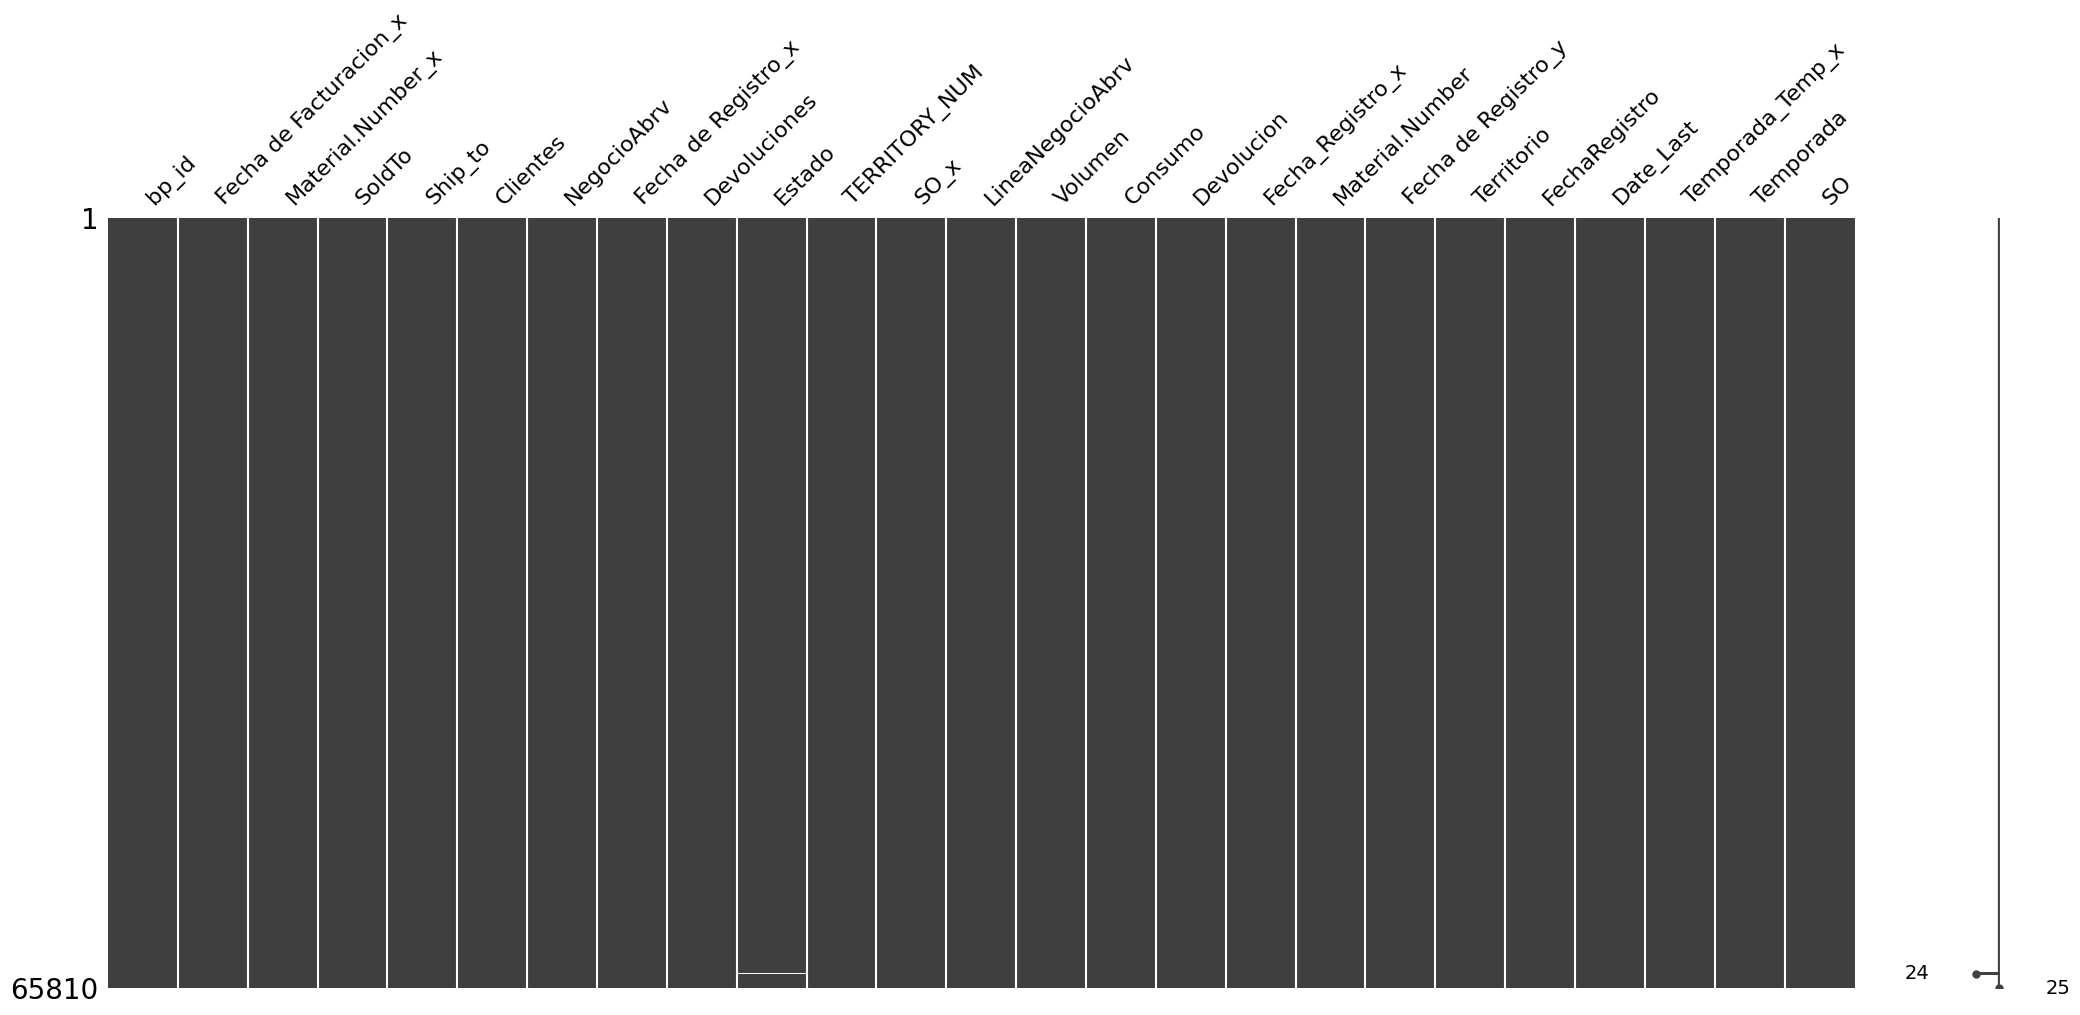

In [79]:
msno.matrix(df_clientes)

### Se agrega el dato de Linea Negocio

### Agrupa y encuentra la moda, manejando grupos vacíos o múltiples modas

In [80]:
LineaNeg = df_clientes.groupby('bp_id')['LineaNegocioAbrv'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index()

df_clientes = df_clientes.merge(LineaNeg, on = 'bp_id', how='left')
df_clientes.rename(columns={'SO_y': 'SO'}, inplace=True)
df_clientes.rename(columns={'LineaNegocioAbrv_y': 'Linea_Negocio'}, inplace=True)
df_clientes

bp_id Fecha de Facturacion_x Material.Number_x    SoldTo   Ship_to  \
0      21107235             2020-02-17             20151  10098325  10098325   
1      21107235             2020-02-17             66545  10098325  10098325   
2      21107235             2020-02-17             57553  10098325  10098325   
3      21107235             2020-02-17             32722  10098325  10098325   
4      21107235             2020-02-17             61499  10098325  10098325   
...         ...                    ...               ...       ...       ...   
65805  26045521             2024-06-03             13175  10380568  10380697   
65806  26045521             2024-06-03             71298  10380568  10380697   
65807  26045521             2024-08-03             73262  10380568  10380697   
65808  26045521             2024-08-03             43950  10380568  10380697   
65809  26085323             2024-03-27             78940  10382201  10382201   

                                Clientes NegocioAbrv Fecha de Registro_x  \
0                          AM ROMA Y CIA          HS          17/11/2017   
1                          AM ROMA Y CIA          OT          17/11/2017   
2                          AM ROMA Y CIA          ST          17/11/2017   
3                          AM ROMA Y CIA          IN          17/11/2017   
4                          AM ROMA Y CIA          FG          17/11/2017   
...                                  ...         ...                 ...   
65805  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65806  IRVING MELESIO GUERRERO HERNANDEZ          FG          16/02/2024   
65807  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65808  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65809                RUBEN BIGURRA PROOM          HN          25/03/2024   

      Devoluciones Estado  ... Fecha_Registro_x Material.Number  \
0                0    CMX  ...       17/11/2017           57553   
1                0    CMX  ...       17/11/2017           57553   
2                0    CMX  ...       17/11/2017           57553   
3                0    CMX  ...       17/11/2017           57553   
4                0    CMX  ...       17/11/2017           57553   
...            ...    ...  ...              ...             ...   
65805            0    PUE  ...       16/02/2024           73262   
65806            0    PUE  ...       16/02/2024           73262   
65807            0    PUE  ...       16/02/2024           73262   
65808            0    PUE  ...       16/02/2024           73262   
65809            0    VER  ...       25/03/2024           78940   

      Fecha de Registro_y Territorio FechaRegistro  Date_Last  \
0              17/11/2017     A5442B    17/11/2017 2023-12-01   
1              17/11/2017     A5442B    17/11/2017 2023-12-01   
2              17/11/2017     A5442B    17/11/2017 2023-12-01   
3              17/11/2017     A5442B    17/11/2017 2023-12-01   
4              17/11/2017     A5442B    17/11/2017 2023-12-01   
...                   ...        ...           ...        ...   
65805          16/02/2024     A9512A    16/02/2024 2024-08-03   
65806          16/02/2024     A9512A    16/02/2024 2024-08-03   
65807          16/02/2024     A9512A    16/02/2024 2024-08-03   
65808          16/02/2024     A9512A    16/02/2024 2024-08-03   
65809          25/03/2024     A5542D    25/03/2024 2024-03-27   

      Temporada_Temp_x Temporada   SO Linea_Negocio  
0                   OI        OI  3CR            HS  
1                   OI        OI  3CR            HS  
2                   OI        OI  3CR            HS  
3                   OI        OI  3CR            HS  
4                   OI        OI  3CR            HS  
...                ...       ...  ...           ...  
65805               PV        OI  3CR            FG  
65806               PV        OI  3CR            FG  
65807               PV        OI  3CR            FG  
65808     

### Arreglamos el nombre de los ESTADOS.


In [81]:
df_clientes['Estado'] = np.where(df_clientes['Estado'] == 'BAJA CALIFORNIA S', 'BAJA CALIFORNIA SUR',
                                np.where(df_clientes['Estado'] == 'BAJA CALIFORNIA N', 'BAJA CALIFORNIA',
                                        df_clientes['Estado']))

In [82]:
df_clientes

bp_id Fecha de Facturacion_x Material.Number_x    SoldTo   Ship_to  \
0      21107235             2020-02-17             20151  10098325  10098325   
1      21107235             2020-02-17             66545  10098325  10098325   
2      21107235             2020-02-17             57553  10098325  10098325   
3      21107235             2020-02-17             32722  10098325  10098325   
4      21107235             2020-02-17             61499  10098325  10098325   
...         ...                    ...               ...       ...       ...   
65805  26045521             2024-06-03             13175  10380568  10380697   
65806  26045521             2024-06-03             71298  10380568  10380697   
65807  26045521             2024-08-03             73262  10380568  10380697   
65808  26045521             2024-08-03             43950  10380568  10380697   
65809  26085323             2024-03-27             78940  10382201  10382201   

                                Clientes NegocioAbrv Fecha de Registro_x  \
0                          AM ROMA Y CIA          HS          17/11/2017   
1                          AM ROMA Y CIA          OT          17/11/2017   
2                          AM ROMA Y CIA          ST          17/11/2017   
3                          AM ROMA Y CIA          IN          17/11/2017   
4                          AM ROMA Y CIA          FG          17/11/2017   
...                                  ...         ...                 ...   
65805  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65806  IRVING MELESIO GUERRERO HERNANDEZ          FG          16/02/2024   
65807  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65808  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65809                RUBEN BIGURRA PROOM          HN          25/03/2024   

      Devoluciones Estado  ... Fecha_Registro_x Material.Number  \
0                0    CMX  ...       17/11/2017           57553   
1                0    CMX  ...       17/11/2017           57553   
2                0    CMX  ...       17/11/2017           57553   
3                0    CMX  ...       17/11/2017           57553   
4                0    CMX  ...       17/11/2017           57553   
...            ...    ...  ...              ...             ...   
65805            0    PUE  ...       16/02/2024           73262   
65806            0    PUE  ...       16/02/2024           73262   
65807            0    PUE  ...       16/02/2024           73262   
65808            0    PUE  ...       16/02/2024           73262   
65809            0    VER  ...       25/03/2024           78940   

      Fecha de Registro_y Territorio FechaRegistro  Date_Last  \
0              17/11/2017     A5442B    17/11/2017 2023-12-01   
1              17/11/2017     A5442B    17/11/2017 2023-12-01   
2              17/11/2017     A5442B    17/11/2017 2023-12-01   
3              17/11/2017     A5442B    17/11/2017 2023-12-01   
4              17/11/2017     A5442B    17/11/2017 2023-12-01   
...                   ...        ...           ...        ...   
65805          16/02/2024     A9512A    16/02/2024 2024-08-03   
65806          16/02/2024     A9512A    16/02/2024 2024-08-03   
65807          16/02/2024     A9512A    16/02/2024 2024-08-03   
65808          16/02/2024     A9512A    16/02/2024 2024-08-03   
65809          25/03/2024     A5542D    25/03/2024 2024-03-27   

      Temporada_Temp_x Temporada   SO Linea_Negocio  
0                   OI        OI  3CR            HS  
1                   OI        OI  3CR            HS  
2                   OI        OI  3CR            HS  
3                   OI        OI  3CR            HS  
4                   OI        OI  3CR            HS  
...                ...       ...  ...           ...  
65805               PV        OI  3CR            FG  
65806               PV        OI  3CR            FG  
65807               PV        OI  3CR            FG  
65808     

### Casteamos tipos de datos:


In [83]:
print(df_clientes.columns)

Index(['bp_id', 'Fecha de Facturacion_x', 'Material.Number_x', 'SoldTo',
       'Ship_to', 'Clientes', 'NegocioAbrv', 'Fecha de Registro_x',
       'Devoluciones', 'Estado', 'TERRITORY_NUM', 'SO_x', 'LineaNegocioAbrv_x',
       'Volumen', 'Consumo', 'Devolucion', 'Fecha_Registro_x',
       'Material.Number', 'Fecha de Registro_y', 'Territorio', 'FechaRegistro',
       'Date_Last', 'Temporada_Temp_x', 'Temporada', 'SO', 'Linea_Negocio'],
      dtype='object')


In [84]:
df_clientes['Consumo'] = pd.to_numeric(df_clientes.Consumo, errors='coerce')
df_clientes['Volumen'] = pd.to_numeric(df_clientes.Volumen, errors='coerce')
# df_clientes['bp_id'] = df_clientes['bp_id'].astype('Int64')
# df_clientes['FechaRegistro'] = pd.to_datetime(df_clientes['FechaRegistro'],format='%Y-%m-%d', errors='coerce')
df_clientes['Fecha de Facturacion_x'] = pd.to_datetime(df_clientes['Fecha de Facturacion_x'],format='%Y-%m-%d', errors='coerce')
df_clientes

bp_id Fecha de Facturacion_x Material.Number_x    SoldTo   Ship_to  \
0      21107235             2020-02-17             20151  10098325  10098325   
1      21107235             2020-02-17             66545  10098325  10098325   
2      21107235             2020-02-17             57553  10098325  10098325   
3      21107235             2020-02-17             32722  10098325  10098325   
4      21107235             2020-02-17             61499  10098325  10098325   
...         ...                    ...               ...       ...       ...   
65805  26045521             2024-06-03             13175  10380568  10380697   
65806  26045521             2024-06-03             71298  10380568  10380697   
65807  26045521             2024-08-03             73262  10380568  10380697   
65808  26045521             2024-08-03             43950  10380568  10380697   
65809  26085323             2024-03-27             78940  10382201  10382201   

                                Clientes NegocioAbrv Fecha de Registro_x  \
0                          AM ROMA Y CIA          HS          17/11/2017   
1                          AM ROMA Y CIA          OT          17/11/2017   
2                          AM ROMA Y CIA          ST          17/11/2017   
3                          AM ROMA Y CIA          IN          17/11/2017   
4                          AM ROMA Y CIA          FG          17/11/2017   
...                                  ...         ...                 ...   
65805  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65806  IRVING MELESIO GUERRERO HERNANDEZ          FG          16/02/2024   
65807  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65808  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65809                RUBEN BIGURRA PROOM          HN          25/03/2024   

      Devoluciones Estado  ... Fecha_Registro_x Material.Number  \
0                0    CMX  ...       17/11/2017           57553   
1                0    CMX  ...       17/11/2017           57553   
2                0    CMX  ...       17/11/2017           57553   
3                0    CMX  ...       17/11/2017           57553   
4                0    CMX  ...       17/11/2017           57553   
...            ...    ...  ...              ...             ...   
65805            0    PUE  ...       16/02/2024           73262   
65806            0    PUE  ...       16/02/2024           73262   
65807            0    PUE  ...       16/02/2024           73262   
65808            0    PUE  ...       16/02/2024           73262   
65809            0    VER  ...       25/03/2024           78940   

      Fecha de Registro_y  Territorio  FechaRegistro  Date_Last  \
0              17/11/2017      A5442B     17/11/2017 2023-12-01   
1              17/11/2017      A5442B     17/11/2017 2023-12-01   
2              17/11/2017      A5442B     17/11/2017 2023-12-01   
3              17/11/2017      A5442B     17/11/2017 2023-12-01   
4              17/11/2017      A5442B     17/11/2017 2023-12-01   
...                   ...         ...            ...        ...   
65805          16/02/2024      A9512A     16/02/2024 2024-08-03   
65806          16/02/2024      A9512A     16/02/2024 2024-08-03   
65807          16/02/2024      A9512A     16/02/2024 2024-08-03   
65808          16/02/2024      A9512A     16/02/2024 2024-08-03   
65809          25/03/2024      A5542D     25/03/2024 2024-03-27   

      Temporada_Temp_x Temporada   SO Linea_Negocio  
0                   OI        OI  3CR            HS  
1                   OI        OI  3CR            HS  
2                   OI        OI  3CR            HS  
3                   OI        OI  3CR            HS  
4                   OI        OI  3CR            HS  
...                ...       ...  ...           ...  
65805               PV        OI  3CR            FG  
65806               PV        OI  3CR            FG  
65807               PV        OI  3CR   

### Determinamos las ventas por cada periodo

In [85]:
df_clientes['Venta_2020'] = np.where(df_clientes['Fecha de Facturacion_x'].dt.year==2020,df_clientes['Consumo'], 0)
df_clientes['Venta_2021'] = np.where(df_clientes['Fecha de Facturacion_x'].dt.year==2021,df_clientes['Consumo'], 0)
df_clientes['Venta_2022'] = np.where(df_clientes['Fecha de Facturacion_x'].dt.year==2022,df_clientes['Consumo'], 0)
df_clientes['Venta_2023'] = np.where(df_clientes['Fecha de Facturacion_x'].dt.year==2023,df_clientes['Consumo'], 0)

In [86]:
df_clientes

bp_id Fecha de Facturacion_x Material.Number_x    SoldTo   Ship_to  \
0      21107235             2020-02-17             20151  10098325  10098325   
1      21107235             2020-02-17             66545  10098325  10098325   
2      21107235             2020-02-17             57553  10098325  10098325   
3      21107235             2020-02-17             32722  10098325  10098325   
4      21107235             2020-02-17             61499  10098325  10098325   
...         ...                    ...               ...       ...       ...   
65805  26045521             2024-06-03             13175  10380568  10380697   
65806  26045521             2024-06-03             71298  10380568  10380697   
65807  26045521             2024-08-03             73262  10380568  10380697   
65808  26045521             2024-08-03             43950  10380568  10380697   
65809  26085323             2024-03-27             78940  10382201  10382201   

                                Clientes NegocioAbrv Fecha de Registro_x  \
0                          AM ROMA Y CIA          HS          17/11/2017   
1                          AM ROMA Y CIA          OT          17/11/2017   
2                          AM ROMA Y CIA          ST          17/11/2017   
3                          AM ROMA Y CIA          IN          17/11/2017   
4                          AM ROMA Y CIA          FG          17/11/2017   
...                                  ...         ...                 ...   
65805  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65806  IRVING MELESIO GUERRERO HERNANDEZ          FG          16/02/2024   
65807  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65808  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65809                RUBEN BIGURRA PROOM          HN          25/03/2024   

      Devoluciones Estado  ... FechaRegistro  Date_Last Temporada_Temp_x  \
0                0    CMX  ...    17/11/2017 2023-12-01               OI   
1                0    CMX  ...    17/11/2017 2023-12-01               OI   
2                0    CMX  ...    17/11/2017 2023-12-01               OI   
3                0    CMX  ...    17/11/2017 2023-12-01               OI   
4                0    CMX  ...    17/11/2017 2023-12-01               OI   
...            ...    ...  ...           ...        ...              ...   
65805            0    PUE  ...    16/02/2024 2024-08-03               PV   
65806            0    PUE  ...    16/02/2024 2024-08-03               PV   
65807            0    PUE  ...    16/02/2024 2024-08-03               PV   
65808            0    PUE  ...    16/02/2024 2024-08-03               PV   
65809            0    VER  ...    25/03/2024 2024-03-27               OI   

       Temporada   SO  Linea_Negocio Venta_2020 Venta_2021 Venta_2022  \
0             OI  3CR             HS   25377.39        0.0        0.0   
1             OI  3CR             HS   15597.79        0.0        0.0   
2             OI  3CR             HS  120115.88        0.0        0.0   
3             OI  3CR             HS   10420.03        0.0        0.0   
4             OI  3CR             HS   36157.40        0.0        0.0   
...          ...  ...            ...        ...        ...        ...   
65805         OI  3CR             FG       0.00        0.0        0.0   
65806         OI  3CR             FG       0.00        0.0        0.0   
65807         OI  3CR             FG       0.00        0.0        0.0   
65808         OI  3CR             FG       0.00        0.0        0.0   
65809         OI  3CR             HN       0.00        0.0        0.0   

      Venta_2023  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  
...          ...  
65805        0.0  
65806        0.0  
65807        0.0  
65808        0.0  
65809        0.0  

[65810 rows x 30 columns]

### Calculamos la frecuencia de compra:

In [87]:
df_clientes['Frec'] = np.where(df_clientes['Consumo'] > 0, 1, 0)
df_clientes

bp_id Fecha de Facturacion_x Material.Number_x    SoldTo   Ship_to  \
0      21107235             2020-02-17             20151  10098325  10098325   
1      21107235             2020-02-17             66545  10098325  10098325   
2      21107235             2020-02-17             57553  10098325  10098325   
3      21107235             2020-02-17             32722  10098325  10098325   
4      21107235             2020-02-17             61499  10098325  10098325   
...         ...                    ...               ...       ...       ...   
65805  26045521             2024-06-03             13175  10380568  10380697   
65806  26045521             2024-06-03             71298  10380568  10380697   
65807  26045521             2024-08-03             73262  10380568  10380697   
65808  26045521             2024-08-03             43950  10380568  10380697   
65809  26085323             2024-03-27             78940  10382201  10382201   

                                Clientes NegocioAbrv Fecha de Registro_x  \
0                          AM ROMA Y CIA          HS          17/11/2017   
1                          AM ROMA Y CIA          OT          17/11/2017   
2                          AM ROMA Y CIA          ST          17/11/2017   
3                          AM ROMA Y CIA          IN          17/11/2017   
4                          AM ROMA Y CIA          FG          17/11/2017   
...                                  ...         ...                 ...   
65805  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65806  IRVING MELESIO GUERRERO HERNANDEZ          FG          16/02/2024   
65807  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65808  IRVING MELESIO GUERRERO HERNANDEZ          IN          16/02/2024   
65809                RUBEN BIGURRA PROOM          HN          25/03/2024   

      Devoluciones Estado  ...  Date_Last Temporada_Temp_x Temporada   SO  \
0                0    CMX  ... 2023-12-01               OI        OI  3CR   
1                0    CMX  ... 2023-12-01               OI        OI  3CR   
2                0    CMX  ... 2023-12-01               OI        OI  3CR   
3                0    CMX  ... 2023-12-01               OI        OI  3CR   
4                0    CMX  ... 2023-12-01               OI        OI  3CR   
...            ...    ...  ...        ...              ...       ...  ...   
65805            0    PUE  ... 2024-08-03               PV        OI  3CR   
65806            0    PUE  ... 2024-08-03               PV        OI  3CR   
65807            0    PUE  ... 2024-08-03               PV        OI  3CR   
65808            0    PUE  ... 2024-08-03               PV        OI  3CR   
65809            0    VER  ... 2024-03-27               OI        OI  3CR   

       Linea_Negocio  Venta_2020 Venta_2021 Venta_2022 Venta_2023 Frec  
0                 HS    25377.39        0.0        0.0        0.0    1  
1                 HS    15597.79        0.0        0.0        0.0    1  
2                 HS   120115.88        0.0        0.0        0.0    1  
3                 HS    10420.03        0.0        0.0        0.0    1  
4                 HS    36157.40        0.0        0.0        0.0    1  
...              ...         ...        ...        ...        ...  ...  
65805             FG        0.00        0.0        0.0        0.0    1  
65806             FG        0.00        0.0        0.0        0.0    1  
65807             FG        0.00        0.0        0.0        0.0    1  
65808             FG        0.00        0.0        0.0        0.0    1  
65809             HN        0.00        0.0        0.0        0.0    1  

[65810 rows x 31 columns]

In [88]:
df_clientes.dtypes

bp_id                             object
Fecha de Facturacion_x    datetime64[ns]
Material.Number_x                 object
SoldTo                            object
Ship_to                           object
Clientes                          object
NegocioAbrv                       object
Fecha de Registro_x               object
Devoluciones                      object
Estado                            object
TERRITORY_NUM                     object
SO_x                              object
LineaNegocioAbrv_x                object
Volumen                          float64
Consumo                          float64
Devolucion                         int64
Fecha_Registro_x                  object
Material.Number                   object
Fecha de Registro_y               object
Territorio                        object
FechaRegistro                     object
Date_Last                 datetime64[ns]
Temporada_Temp_x                  object
Temporada                         object
SO              

### Cambiamos las dimensiones por bp_id

In [89]:
new_df = df_clientes.groupby([
                                'bp_id',
                                'Estado',
                                'Territorio',
                                'Fecha de Registro_y',
                                'Material.Number',
                                'Temporada',
                                'SO',
                                'Linea_Negocio',
                                'Date_Last']).agg({
                                                    'Ship_to': 'nunique',  
                                                    'Devolucion': 'sum',
                                                    'Volumen': 'sum', 
                                                    'Consumo': 'sum', 
                                                    'Frec': 'sum',
                                                    'Venta_2020': 'sum',
                                                    'Venta_2021': 'sum',
                                                    'Venta_2022': 'sum',
                                                    'Venta_2023': 'sum'
                                }).reset_index()
new_df

bp_id Estado Territorio Fecha de Registro_y Material.Number Temporada  \
0    21107235    CMX     A5442B          17/11/2017           57553        OI   
1    21107240    CMX     A4742A          17/11/2017           58275        OI   
2    21107243    CMX     A4A42A          17/11/2017         1000218        OI   
3    21107250    AGU     A9462I          17/11/2017           32714        OI   
4    21107252    AGU     A5642I          17/11/2017           13215        OI   
..        ...    ...        ...                 ...             ...       ...   
553  26041016    ROO     A9482B          23/01/2024           27198        OI   
554  26041032    BCN     A9572B          23/01/2024           39261        OI   
555  26045516    OAX     A9352D          15/02/2024           36229        OI   
556  26045521    PUE     A9512A          16/02/2024           73262        OI   
557  26085323    VER     A5542D          25/03/2024           78940        OI   

      SO Linea_Negocio  Date_Last  Ship_to  Devolucion   Volumen     Consumo  \
0    3CR            HS 2023-12-01        1           1   2051.96  1661662.08   
1    3ST            ST 2024-11-01        2           2   2532.76  9146759.60   
2    3IS            IN 2024-03-23        1           1   6450.00  2949197.74   
3    3CR            IN 2022-10-03        1           0    930.52   704153.67   
4    3CR            FG 2023-11-25        6           1  18541.64  9523541.10   
..   ...           ...        ...      ...         ...       ...         ...   
553  3CR            HS 2024-03-20        1           0    601.60   170577.22   
554  3CR            FG 2024-12-03        1           0    250.80   323877.93   
555  3CR            IN 2024-03-27        1           0   1718.52   861945.31   
556  3CR            FG 2024-08-03        1           0    456.89   293467.33   
557  3CR            HN 2024-03-27        1           0   5000.00   474997.12   

     Frec  Venta_2020  Venta_2021  Venta_2022  Venta_2023  
0      61   289251.93        0.00   679578.02   692832.13  
1      33  2790523.13  1454150.98  2649461.21   762346.28  
2       5        0.00        0.00        0.00  1805358.37  
3      16   372997.69   203784.31   127371.67        0.00  
4      83  2817710.46        0.00  4398636.92  2307193.72  
..    ...         ...         ...         ...         ...  
553    21        0.00        0.00        0.00        0.00  
554     9        0.00        0.00        0.00        0.00  
555    34        0.00        0.00        0.00        0.00  
556    25        0.00        0.00        0.00        0.00  
557     1        0.00        0.00        0.00        0.00  

[558 rows x 18 columns]

Esta bandera nos permite determinar si un cliente compro solo una vez o compro varias veces

In [90]:
new_df = new_df.sort_values(['Date_Last', 'bp_id'])
new_df['Compro'] = np.where(new_df['Consumo'] > 0, 1, 0)

Determinamos la bandera Churn.

In [91]:
## Calculamos el crecimiento por periodo anual
new_df['Crecimiento_21vs20'] = np.where(new_df['Venta_2020']!=0,(new_df['Venta_2021']- new_df['Venta_2020'])/new_df['Venta_2020'], 0)
new_df['Crecimiento_22vs21'] = np.where(new_df['Venta_2021']!=0,(new_df['Venta_2022']- new_df['Venta_2021'])/new_df['Venta_2021'], 0)
new_df['Crecimiento_23vs22'] = np.where(new_df['Venta_2022']!=0,(new_df['Venta_2023']- new_df['Venta_2022'])/new_df['Venta_2022'], 0)

In [92]:
# Obtener la fecha del sistema
fecha_sistema = pd.Timestamp(datetime.now().date())

Se define una funcion months_diff que toma un objeto Timedelta y devuelve la diferencia en meses como un valor entero. 

In [93]:
def months_diff(td):
    return td.days // 30 if td is not pd.NaT else 0

Agrupar por bp_id y calcular la diferencia entre la ultima fecha de compra:


In [94]:
new_df['Tiempo_ultima_compra'] = new_df.groupby('bp_id')['Date_Last'].transform(lambda x: np.abs((fecha_sistema - x.max()).days))

Casteamos el tipo de dato y renombramos

In [96]:
new_df.rename(columns={'Fecha de Registro_y': 'FechaRegistro'}, inplace=True)

new_df['FechaRegistro'] = pd.to_datetime(new_df['FechaRegistro'])
new_df

C:\Users\carlo\AppData\Local\Temp\ipykernel_21064\4143277169.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  new_df['FechaRegistro'] = pd.to_datetime(new_df['FechaRegistro'])


bp_id Estado Territorio FechaRegistro Material.Number Temporada   SO  \
298  21293987    MIC     A9142O    2019-08-27         1001368        OI  3CR   
98   21107952    VER     A5542E    2017-11-17           24728        OI  3CR   
135  21108647    MOR     A9352B    2017-11-17           55452        OI  3CR   
284  21277503    OAX     A9352E    2019-07-05           25958        OI  3CR   
314  21320909    JAL     A4742A    2019-12-19           39490        OI  3ST   
..        ...    ...        ...           ...             ...       ...  ...   
511  25201116    MIC     A9142A    2023-03-17           13175        OI  3CR   
524  26005072    PUE     A9512E    2023-04-07           13175        OI  3CR   
531  26011524    SIN     A9492D    2023-07-08           27196        OI  3CR   
540  26019912    MIC     A9472J    2023-09-21           72341        OI  3CR   
554  26041032    BCN     A9572B    2024-01-23           39261        OI  3CR   

    Linea_Negocio  Date_Last  Ship_to  ...  Frec  Venta_2020  Venta_2021  \
298            FG 2020-01-28        1  ...     2   237859.48         0.0   
98             FG 2020-01-30        1  ...     2    52138.70         0.0   
135            FG 2020-01-30        1  ...    12   247348.89         0.0   
284            HS 2020-01-30        1  ...     4   250934.31         0.0   
314            ST 2020-01-30        1  ...     1   307481.26         0.0   
..            ...        ...      ...  ...   ...         ...         ...   
511            IN 2024-12-03        1  ...    15        0.00         0.0   
524            FG 2024-12-03        1  ...    47        0.00         0.0   
531            IN 2024-12-03        1  ...    52        0.00         0.0   
540            NU 2024-12-03        1  ...    48        0.00         0.0   
554            FG 2024-12-03        1  ...     9        0.00         0.0   

     Venta_2022  Venta_2023  Compro  Crecimiento_21vs20  Crecimiento_22vs21  \
298         0.0        0.00       1                -1.0                 0.0   
98          0.0        0.00       1                -1.0                 0.0   
135         0.0        0.00       1                -1.0                 0.0   
284         0.0        0.00       1                -1.0                 0.0   
314         0.0        0.00       1                -1.0                 0.0   
..          ...         ...     ...                 ...                 ...   
511         0.0  -641163.78       1                 0.0                 0.0   
524         0.0   662931.39       1                 0.0                 0.0   
531         0.0   892363.51       1                 0.0                 0.0   
540         0.0   295280.37       1                 0.0                 0.0   
554         0.0        0.00       1                 0.0                 0.0   

     Crecimiento_23vs22  Tiempo_ultima_compra  
298                 0.0                  1538  
98                  0.0                  1536  
135                 0.0                  1536  
284                 0.0                  1536  
314                 0.0                  1536  
..                  ...                   ...  
511                 0.0                   233  
524                 0.0                   233  
531                 0.0                   233  
540                 0.0                   233  
554                 0.0                   233  

[558 rows x 23 columns]

In [97]:
# Obtenemos el año de registro del cliente
new_df['Anio_Registro'] = new_df['FechaRegistro'].dt.year

# Determinamos si un cliente es nuevo:
new_df['Cliente_Nuevo'] = np.where(new_df['FechaRegistro'].dt.year==fecha_sistema.year, True, False)

Calculamos la antiguedad del cliente

In [98]:
new_df['Antiguedad'] = new_df.groupby('bp_id')['FechaRegistro'].transform(lambda x: (fecha_sistema - x).dt.days)
new_df

bp_id Estado Territorio FechaRegistro Material.Number Temporada   SO  \
298  21293987    MIC     A9142O    2019-08-27         1001368        OI  3CR   
98   21107952    VER     A5542E    2017-11-17           24728        OI  3CR   
135  21108647    MOR     A9352B    2017-11-17           55452        OI  3CR   
284  21277503    OAX     A9352E    2019-07-05           25958        OI  3CR   
314  21320909    JAL     A4742A    2019-12-19           39490        OI  3ST   
..        ...    ...        ...           ...             ...       ...  ...   
511  25201116    MIC     A9142A    2023-03-17           13175        OI  3CR   
524  26005072    PUE     A9512E    2023-04-07           13175        OI  3CR   
531  26011524    SIN     A9492D    2023-07-08           27196        OI  3CR   
540  26019912    MIC     A9472J    2023-09-21           72341        OI  3CR   
554  26041032    BCN     A9572B    2024-01-23           39261        OI  3CR   

    Linea_Negocio  Date_Last  Ship_to  ...  Venta_2022  Venta_2023  Compro  \
298            FG 2020-01-28        1  ...         0.0        0.00       1   
98             FG 2020-01-30        1  ...         0.0        0.00       1   
135            FG 2020-01-30        1  ...         0.0        0.00       1   
284            HS 2020-01-30        1  ...         0.0        0.00       1   
314            ST 2020-01-30        1  ...         0.0        0.00       1   
..            ...        ...      ...  ...         ...         ...     ...   
511            IN 2024-12-03        1  ...         0.0  -641163.78       1   
524            FG 2024-12-03        1  ...         0.0   662931.39       1   
531            IN 2024-12-03        1  ...         0.0   892363.51       1   
540            NU 2024-12-03        1  ...         0.0   295280.37       1   
554            FG 2024-12-03        1  ...         0.0        0.00       1   

     Crecimiento_21vs20  Crecimiento_22vs21  Crecimiento_23vs22  \
298                -1.0                 0.0                 0.0   
98                 -1.0                 0.0                 0.0   
135                -1.0                 0.0                 0.0   
284                -1.0                 0.0                 0.0   
314                -1.0                 0.0                 0.0   
..                  ...                 ...                 ...   
511                 0.0                 0.0                 0.0   
524                 0.0                 0.0                 0.0   
531                 0.0                 0.0                 0.0   
540                 0.0                 0.0                 0.0   
554                 0.0                 0.0                 0.0   

     Tiempo_ultima_compra  Anio_Registro  Cliente_Nuevo  Antiguedad  
298                  1538           2019          False        1692  
98                   1536           2017          False        2340  
135                  1536           2017          False        2340  
284                  1536           2019          False        1745  
314                  1536           2019          False        1578  
..                    ...            ...            ...         ...  
511                   233           2023          False         394  
524                   233           2023          False         373  
531                   233           2023          False         281  
540                   233           2023          False         206  
554                   233           2024           True          82  

[558 rows x 26 columns]

Determinamos el percentil 75 y calculamos el churn

In [99]:
# percentiles = new_df[new_df['Frec'] >=6]
percentiles = new_df
percentiles = percentiles.groupby('bp_id').agg(percentile_75=('Tiempo_ultima_compra', lambda x: np.percentile(x, 75))).reset_index()
percentiles = percentiles.sort_values('percentile_75')
percentiles['percentile_75'] = np.percentile(new_df['Tiempo_ultima_compra'], 75)
percentile75 = np.percentile(new_df['Tiempo_ultima_compra'], 75)

print(percentile75, '\n')

# Unimos el dato de percentil al dataframe original
new_df = new_df.merge(percentiles, on='bp_id', how='left') 

# Determinamos la bandera de ciompra unica de un cliente:
new_df['Compra_unica'] = np.where(new_df['Frec'] == 1 & new_df['percentile_75'].isnull(), True, False)

new_df['Churn'] = np.where(new_df['Tiempo_ultima_compra'] > new_df['percentile_75'],True, False)

413.5 



Validación para datos duplicados

In [100]:
if (new_df['bp_id'].duplicated().all() == True):  
    print('si hay duplicado \n')
else:
    print('No hay duplicado \n')

No hay duplicado 



Imprimimos la fecha de sistema:

In [101]:
print(fecha_sistema, '\n')

2024-04-14 00:00:00 



Imprimimos la fecha de compra minima.

In [102]:
print(new_df['Date_Last'].min(), '\n')

2020-01-28 00:00:00 



Imprimimos la fecha de compra maxima.

In [103]:
print(new_df['Date_Last'].min(), '\n')

2020-01-28 00:00:00 



Cantidad de clientes:

In [104]:
print('\n', len(new_df['bp_id']))


 558


Percentil

In [105]:
print('\n', new_df['percentile_75'])


 0      413.5
1      413.5
2      413.5
3      413.5
4      413.5
       ...  
553    413.5
554    413.5
555    413.5
556    413.5
557    413.5
Name: percentile_75, Length: 558, dtype: float64


In [108]:
new_df

bp_id Estado Territorio FechaRegistro Material.Number Temporada   SO  \
0    21293987    MIC     A9142O    2019-08-27         1001368        OI  3CR   
1    21107952    VER     A5542E    2017-11-17           24728        OI  3CR   
2    21108647    MOR     A9352B    2017-11-17           55452        OI  3CR   
3    21277503    OAX     A9352E    2019-07-05           25958        OI  3CR   
4    21320909    JAL     A4742A    2019-12-19           39490        OI  3ST   
..        ...    ...        ...           ...             ...       ...  ...   
553  25201116    MIC     A9142A    2023-03-17           13175        OI  3CR   
554  26005072    PUE     A9512E    2023-04-07           13175        OI  3CR   
555  26011524    SIN     A9492D    2023-07-08           27196        OI  3CR   
556  26019912    MIC     A9472J    2023-09-21           72341        OI  3CR   
557  26041032    BCN     A9572B    2024-01-23           39261        OI  3CR   

    Linea_Negocio  Date_Last  Ship_to  ...  Crecimiento_21vs20  \
0              FG 2020-01-28        1  ...                -1.0   
1              FG 2020-01-30        1  ...                -1.0   
2              FG 2020-01-30        1  ...                -1.0   
3              HS 2020-01-30        1  ...                -1.0   
4              ST 2020-01-30        1  ...                -1.0   
..            ...        ...      ...  ...                 ...   
553            IN 2024-12-03        1  ...                 0.0   
554            FG 2024-12-03        1  ...                 0.0   
555            IN 2024-12-03        1  ...                 0.0   
556            NU 2024-12-03        1  ...                 0.0   
557            FG 2024-12-03        1  ...                 0.0   

     Crecimiento_22vs21  Crecimiento_23vs22  Tiempo_ultima_compra  \
0                   0.0                 0.0                  1538   
1                   0.0                 0.0                  1536   
2                   0.0                 0.0                  1536   
3                   0.0                 0.0                  1536   
4                   0.0                 0.0                  1536   
..                  ...                 ...                   ...   
553                 0.0                 0.0                   233   
554                 0.0                 0.0                   233   
555                 0.0                 0.0                   233   
556                 0.0                 0.0                   233   
557                 0.0                 0.0                   233   

     Anio_Registro  Cliente_Nuevo  Antiguedad  percentile_75  Compra_unica  \
0             2019          False        1692          413.5         False   
1             2017          False        2340          413.5         False   
2             2017          False        2340          413.5         False   
3             2019          False        1745          413.5         False   
4             2019          False        1578          413.5         False   
..             ...            ...         ...            ...           ...   
553           2023          False         394          413.5         False   
554           2023          False         373          413.5         False   
555           2023          False         281          413.5         False   
556           2023          False         206          413.5         False   
557           2024           True          82          413.5         False   

     Churn  
0     True  
1     True  
2     True  
3     True  
4     True  
..     ...  
553  False  
554  False  
555  False  
556  False  
557  False  

[558 rows x 29 columns]

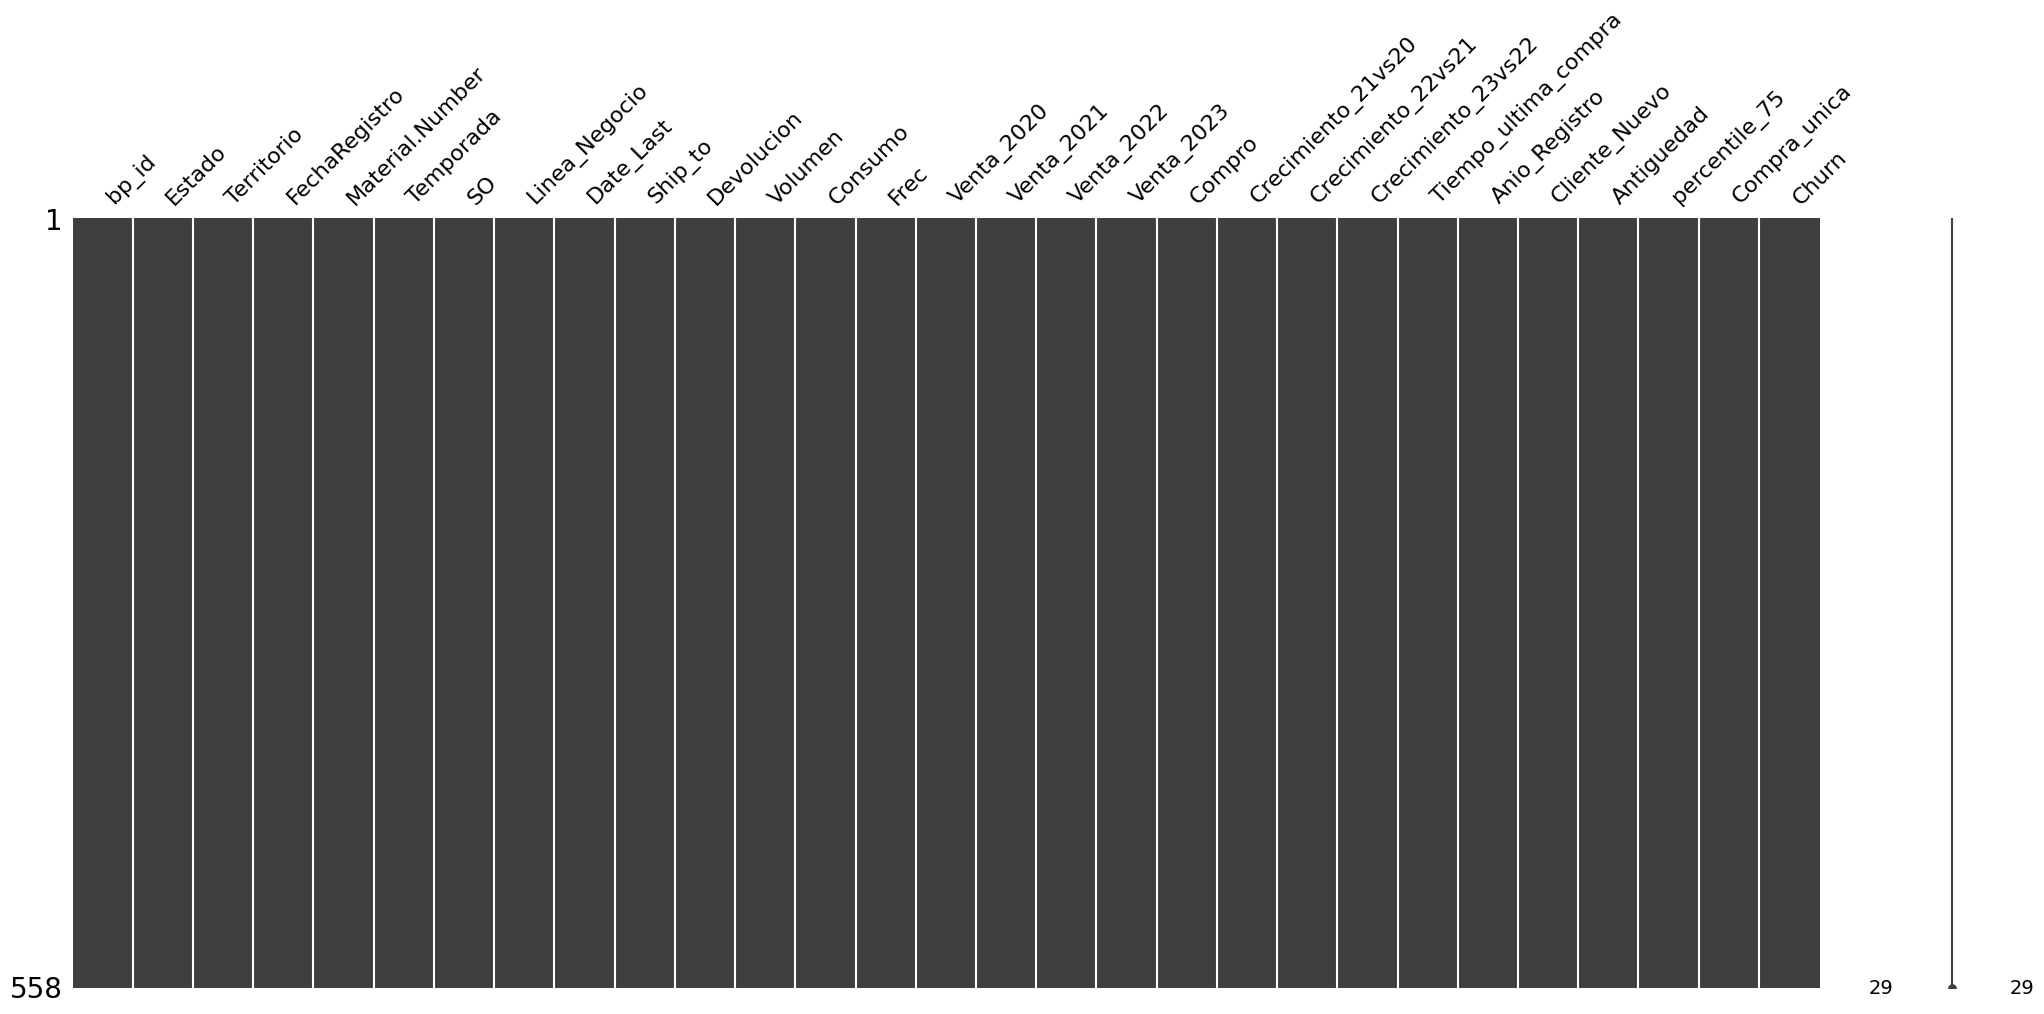

In [106]:
msno.matrix(new_df);

Exportamos los archivos para usar el algoritmo de regresión logistica

In [107]:
# Escribir el DataFrame en un archivo de Excel
new_df.to_excel('./Output/Customer_Churn.xlsx', index=False)